# Including Libraries

In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
import itertools
import warnings
import os
import plotly.express as px

warnings.filterwarnings('ignore')

# Loading the datasets

In [2]:

# Including the Datasets
Crema_Path = r"archive (1)/Crema"
Ravdess_Path = r"archive (1)/Ravdess"
Savee_Path = r"archive (1)/Savee"
Tess_Path = r"archive (1)/Tess"

# Preprocessing CREMA Dataset

In [3]:
crema = []
for wav in os.listdir(Crema_Path):
    emotion = wav.partition(".wav")[0].split('_')
    if emotion[2] == 'SAD':
        crema.append(('sad', os.path.join(Crema_Path, wav)))
    elif emotion[2] == 'ANG':
        crema.append(('angry', os.path.join(Crema_Path, wav)))
    elif emotion[2] == 'DIS':
        crema.append(('disgust', os.path.join(Crema_Path, wav)))
    elif emotion[2] == 'FEA':
        crema.append(('fear', os.path.join(Crema_Path, wav)))
    elif emotion[2] == 'HAP':
        crema.append(('happy', os.path.join(Crema_Path, wav)))
    elif emotion[2] == 'NEU':
        crema.append(('neutral', os.path.join(Crema_Path, wav)))
    else:
        crema.append(('unknown', os.path.join(Crema_Path, wav)))


# Contents of the Crema list

In [4]:


print(f"Crema list sample: {crema[:5]}")

Crema list sample: [('angry', 'archive (1)/Crema\\1001_DFA_ANG_XX.wav'), ('disgust', 'archive (1)/Crema\\1001_DFA_DIS_XX.wav'), ('fear', 'archive (1)/Crema\\1001_DFA_FEA_XX.wav'), ('happy', 'archive (1)/Crema\\1001_DFA_HAP_XX.wav'), ('neutral', 'archive (1)/Crema\\1001_DFA_NEU_XX.wav')]


# Crema DataFrame sample

In [5]:

Crema_df = pd.DataFrame(crema, columns=['Emotion', 'File_Path'])
print(f"Crema DataFrame sample:\n{Crema_df.head()}")


Crema DataFrame sample:
   Emotion                              File_Path
0    angry  archive (1)/Crema\1001_DFA_ANG_XX.wav
1  disgust  archive (1)/Crema\1001_DFA_DIS_XX.wav
2     fear  archive (1)/Crema\1001_DFA_FEA_XX.wav
3    happy  archive (1)/Crema\1001_DFA_HAP_XX.wav
4  neutral  archive (1)/Crema\1001_DFA_NEU_XX.wav


# CREMA Dataframe Structure

In [6]:
print(Crema_df.shape)

print(Crema_df.info())


(7442, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotion    7442 non-null   object
 1   File_Path  7442 non-null   object
dtypes: object(2)
memory usage: 116.4+ KB
None


# Graphical representation of Crema 

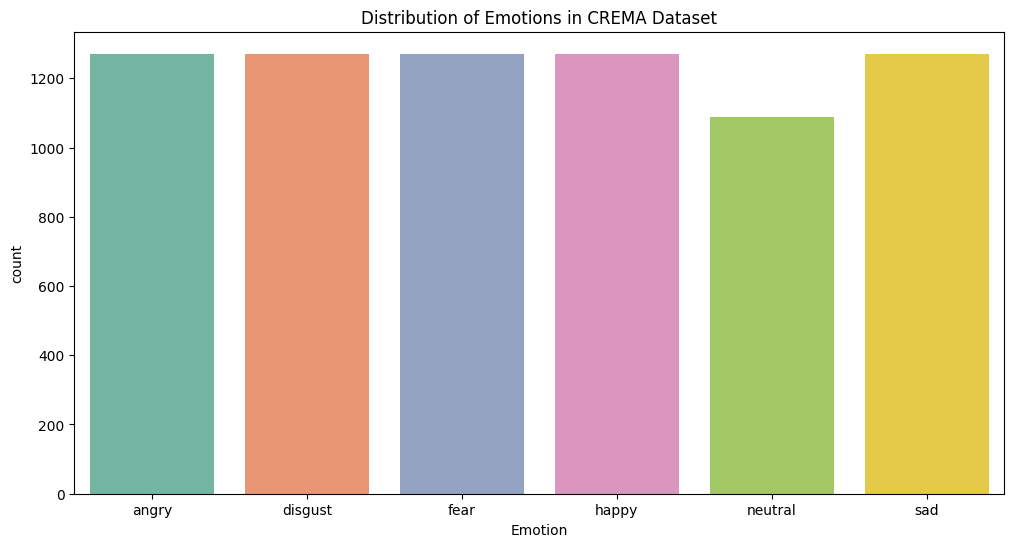

In [7]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Emotions in CREMA Dataset')
emotions=sns.countplot(x='Emotion',data=Crema_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels())
plt.show()


# Graphical Representation of each emotion in CREMA dataset

In [8]:
emotion_names=Crema_df['Emotion'].unique()
print("CREMA emotion names:" , emotion_names)

colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

CREMA emotion names: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']


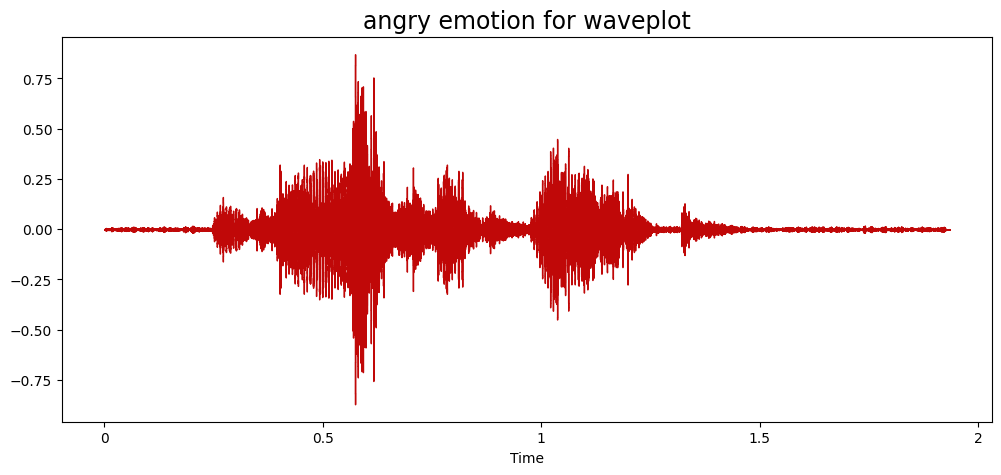

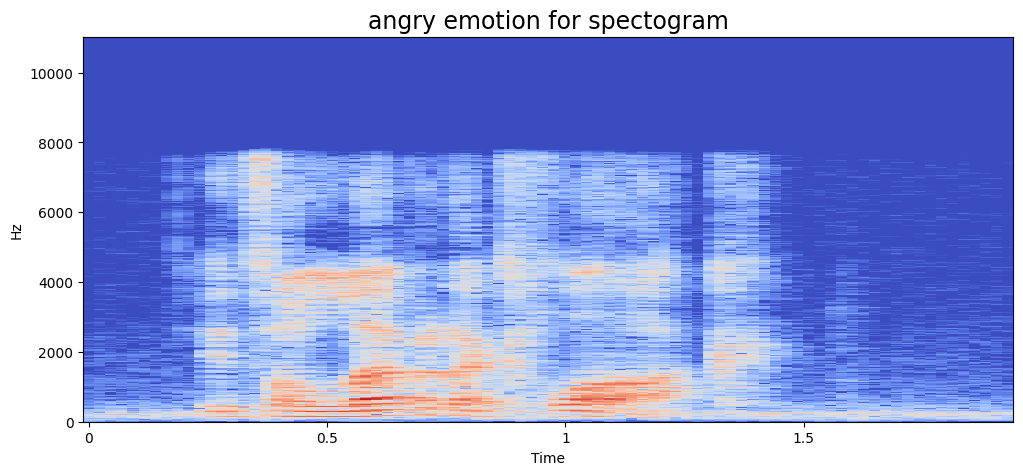

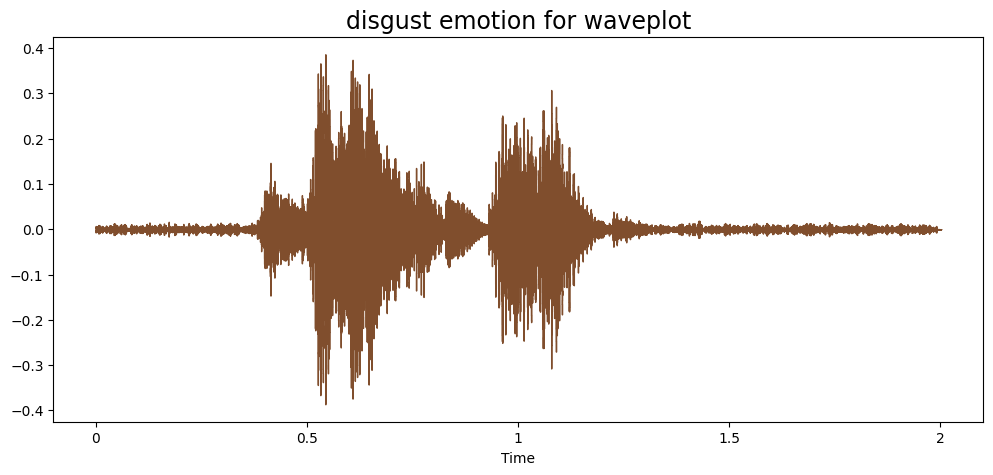

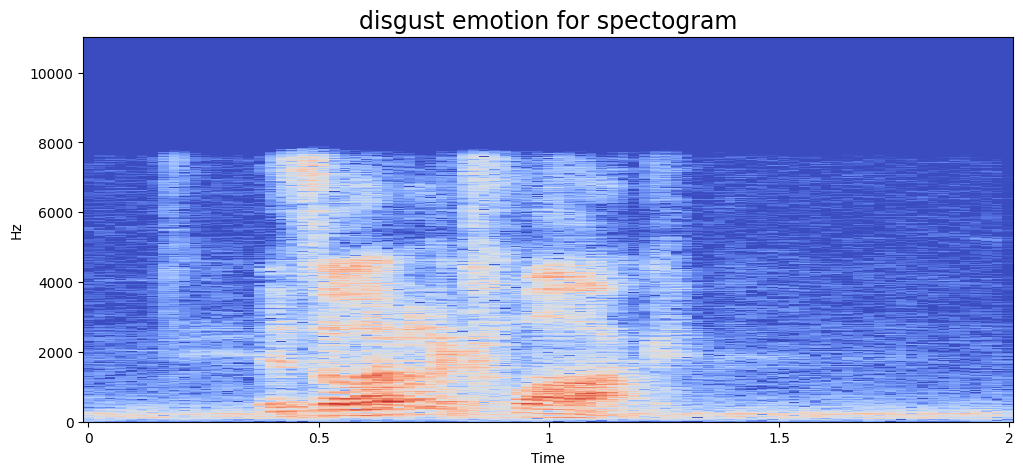

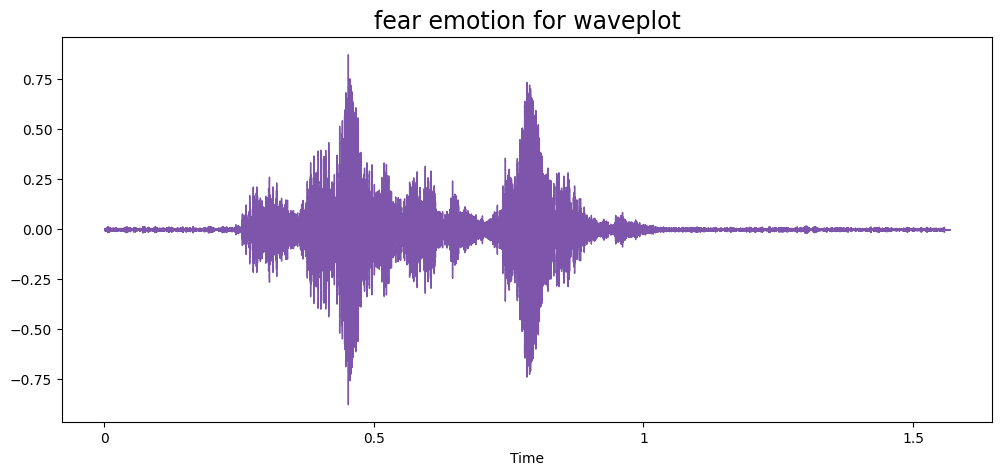

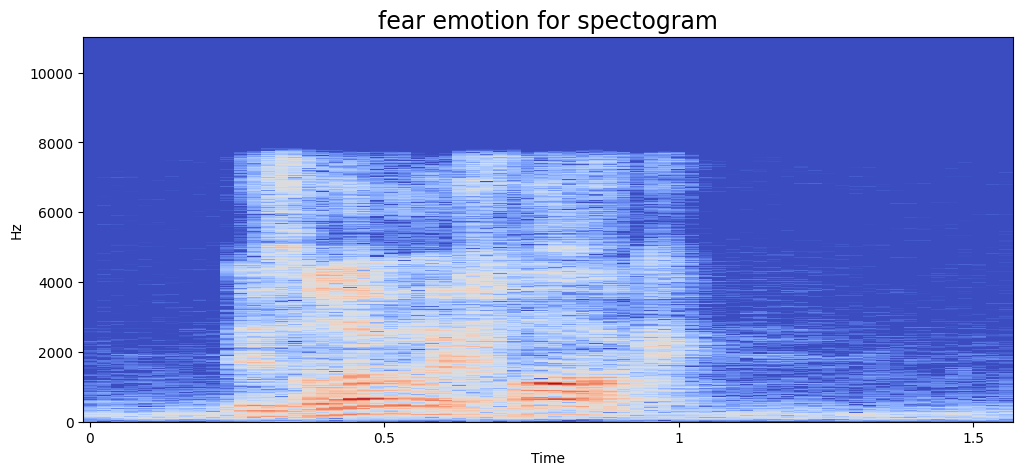

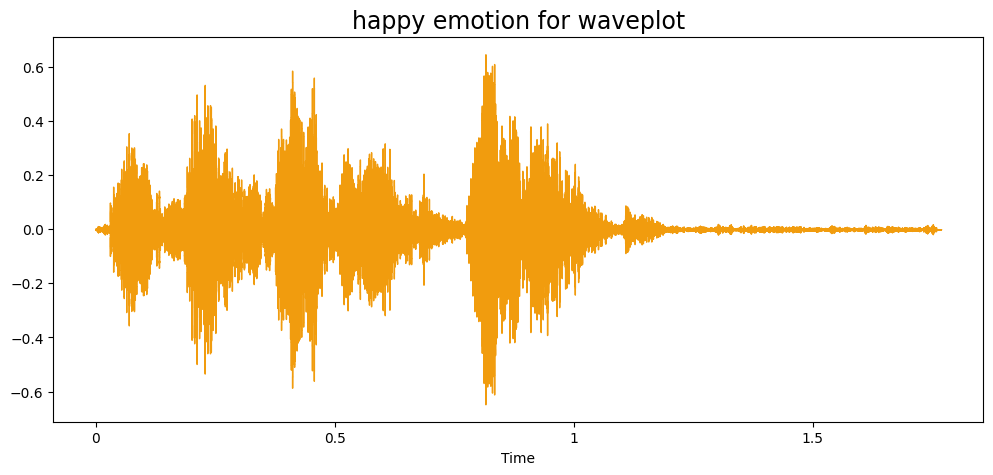

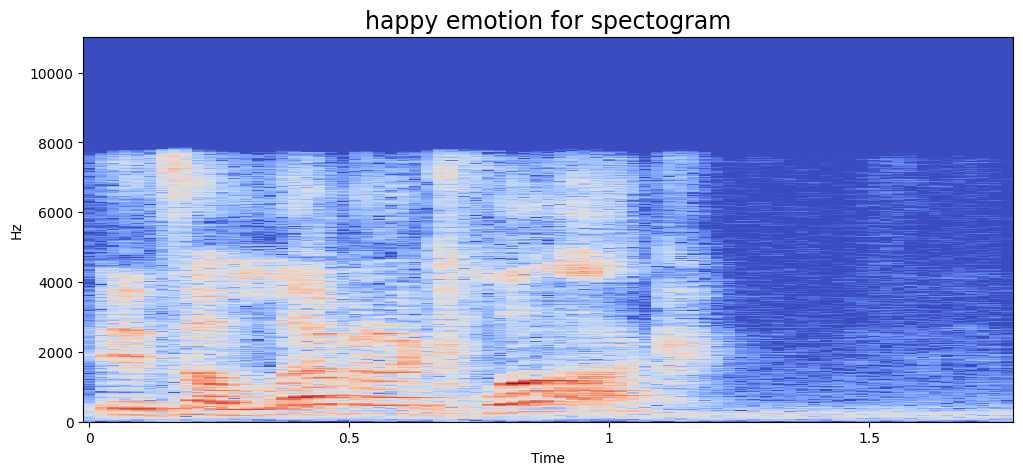

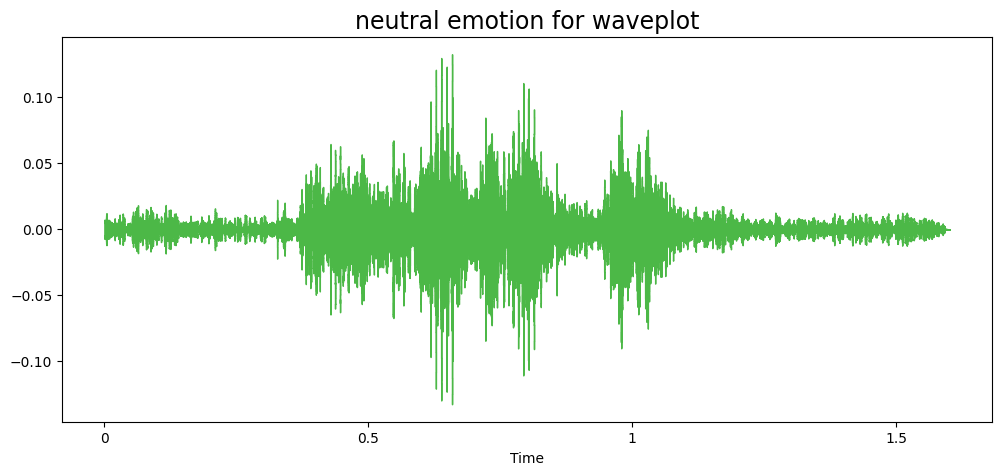

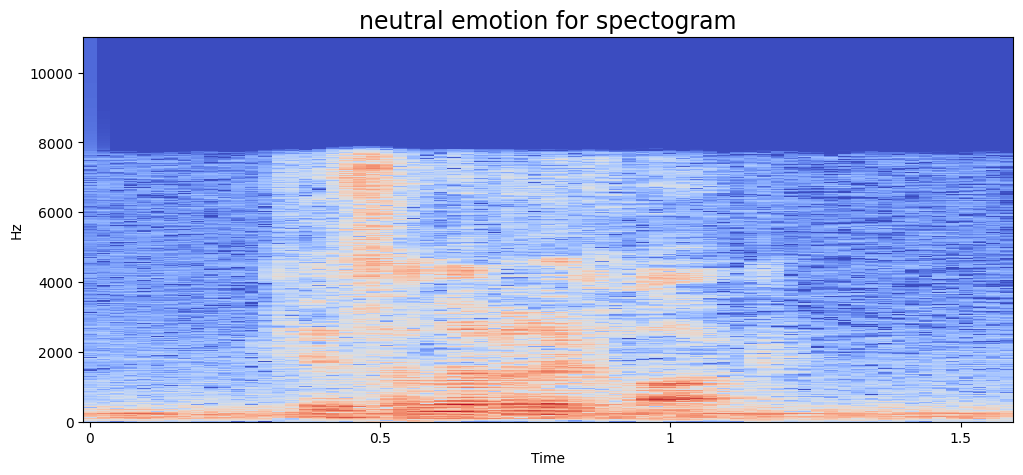

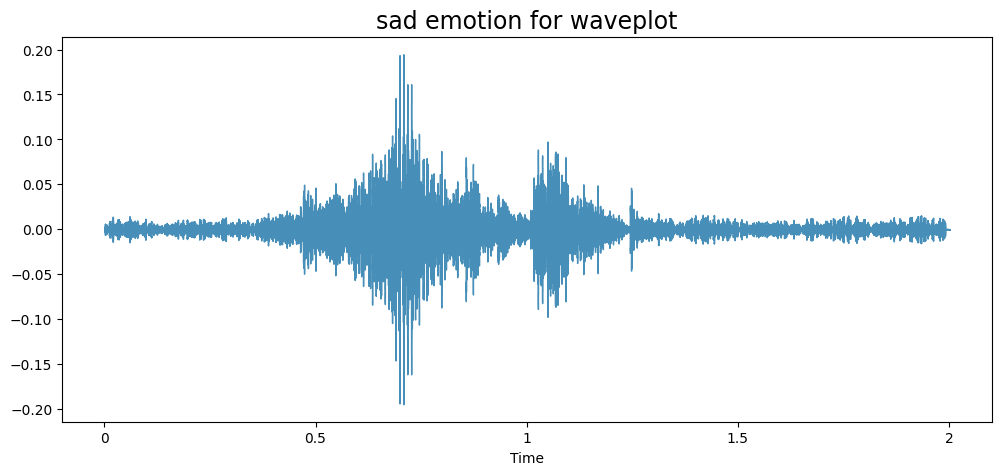

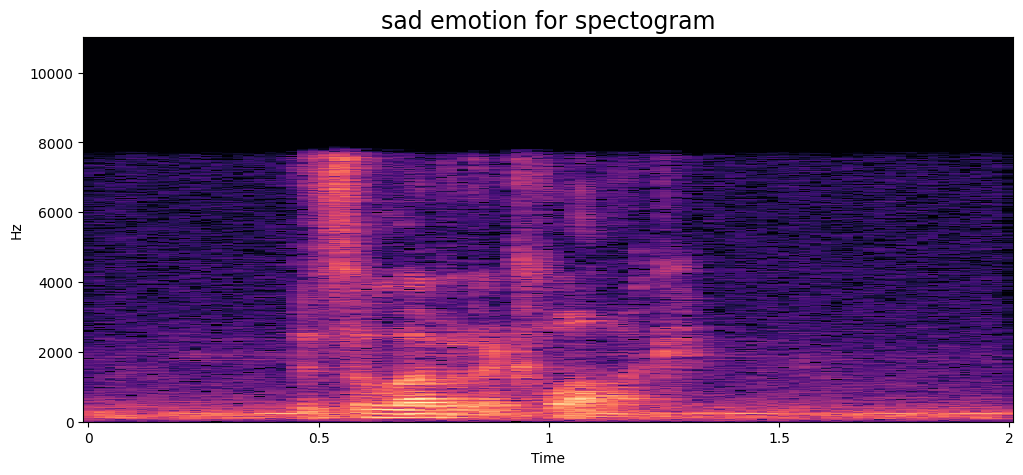

In [9]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')
audio_path=[]
for emotion in emotion_names:
    path=np.array(Crema_df['File_Path'][Crema_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)



# Preprocessing Ravdess Dataset

In [10]:
ravdess = []
for directory in os.listdir(Ravdess_Path):
    dir_path = os.path.join(Ravdess_Path, directory)
    if os.path.isdir(dir_path):
        for wav in os.listdir(dir_path):
            wav_path = os.path.join(dir_path, wav)
            if wav.endswith('.wav'):
                emotion = wav.partition('.wav')[0].split('-')
                if len(emotion) > 2:  # Check if there are enough elements
                    try:
                        emotion_number = int(emotion[2])
                        ravdess.append((emotion_number, wav_path))
                    except ValueError:
                        print(f"Skipping file with invalid emotion number: {wav}")



# Contents of the ravdess list

In [11]:
print(f"Ravdess list sample: {ravdess[:5]}")

Ravdess list sample: [(1, 'archive (1)/Ravdess\\Actor_01\\03-01-01-01-01-01-01.wav'), (1, 'archive (1)/Ravdess\\Actor_01\\03-01-01-01-01-02-01.wav'), (1, 'archive (1)/Ravdess\\Actor_01\\03-01-01-01-02-01-01.wav'), (1, 'archive (1)/Ravdess\\Actor_01\\03-01-01-01-02-02-01.wav'), (2, 'archive (1)/Ravdess\\Actor_01\\03-01-02-01-01-01-01.wav')]


# Ravdess DataFrame sample

In [12]:
Ravdess_df = pd.DataFrame(ravdess, columns=['Emotion', 'File_Path'])
print(f"Ravdess DataFrame sample:\n{Ravdess_df.head()}")

Ravdess DataFrame sample:
   Emotion                                          File_Path
0        1  archive (1)/Ravdess\Actor_01\03-01-01-01-01-01...
1        1  archive (1)/Ravdess\Actor_01\03-01-01-01-01-02...
2        1  archive (1)/Ravdess\Actor_01\03-01-01-01-02-01...
3        1  archive (1)/Ravdess\Actor_01\03-01-01-01-02-02...
4        2  archive (1)/Ravdess\Actor_01\03-01-02-01-01-01...


# Processed Ravdess Dataframe sample

In [13]:
Ravdess_df['Emotion'].replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)
print(f"Ravdess DataFrame sample:\n{Ravdess_df.head()}")

Ravdess DataFrame sample:
   Emotion                                          File_Path
0  neutral  archive (1)/Ravdess\Actor_01\03-01-01-01-01-01...
1  neutral  archive (1)/Ravdess\Actor_01\03-01-01-01-01-02...
2  neutral  archive (1)/Ravdess\Actor_01\03-01-01-01-02-01...
3  neutral  archive (1)/Ravdess\Actor_01\03-01-01-01-02-02...
4     calm  archive (1)/Ravdess\Actor_01\03-01-02-01-01-01...


# Ravdees DataFrame structure

In [14]:
print(Ravdess_df.shape)
print(Ravdess_df.info())


(1440, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotion    1440 non-null   object
 1   File_Path  1440 non-null   object
dtypes: object(2)
memory usage: 22.6+ KB
None


# Graphical Representation of Ravdess 

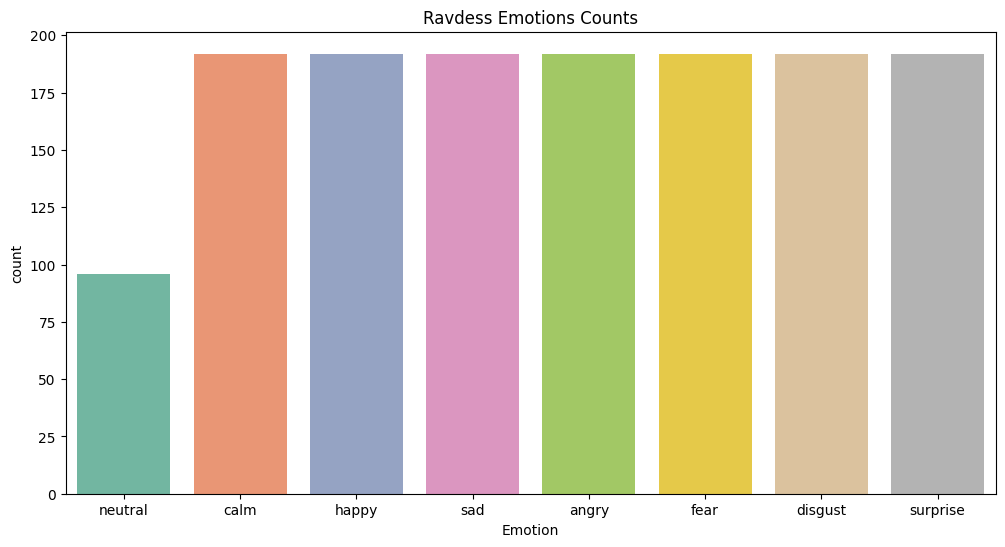

In [15]:
plt.figure(figsize=(12,6))
plt.title('Ravdess Emotions Counts')
emotions=sns.countplot(x='Emotion',data=Ravdess_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels())
plt.show()

# Graphical Representation of each emotion in RAVDESS Dataset

In [16]:
emotion_names=Ravdess_df['Emotion'].unique()
print("Ravdess emotion names:" , emotion_names)

colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF','calm':'#804E2E' }

Ravdess emotion names: ['neutral' 'calm' 'happy' 'sad' 'angry' 'fear' 'disgust' 'surprise']


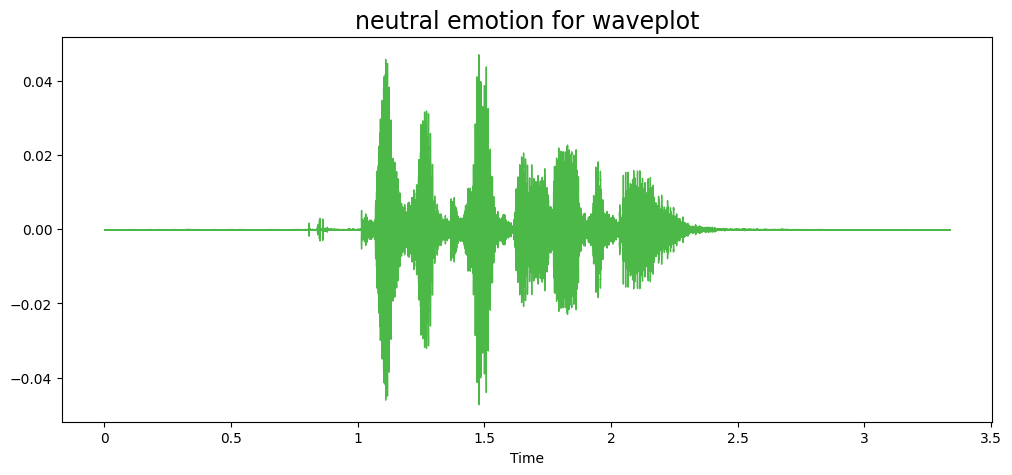

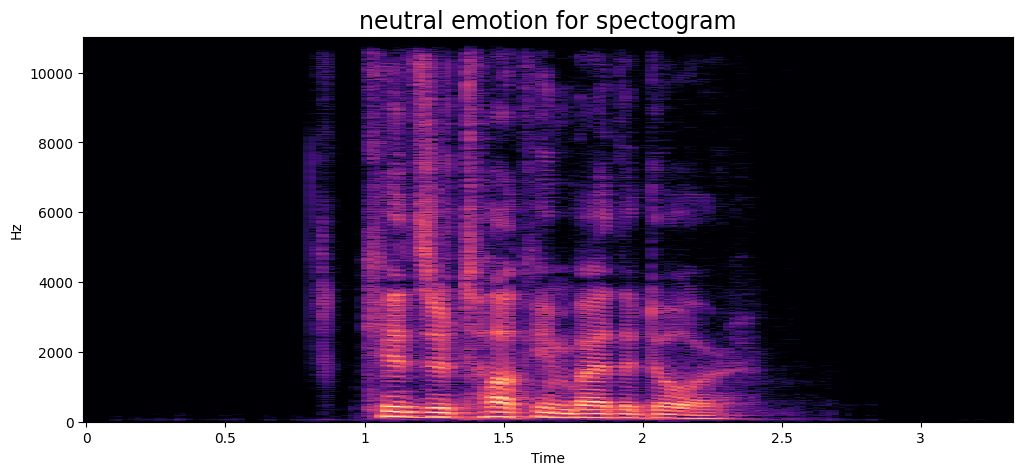

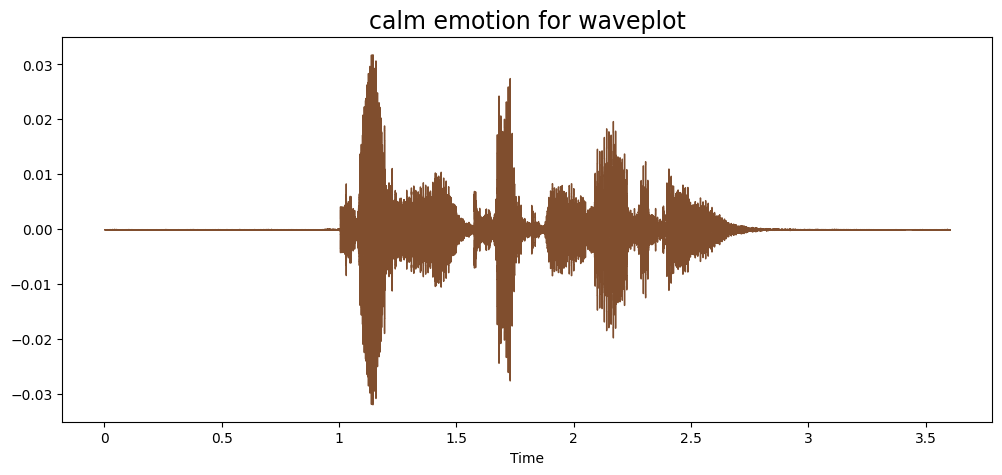

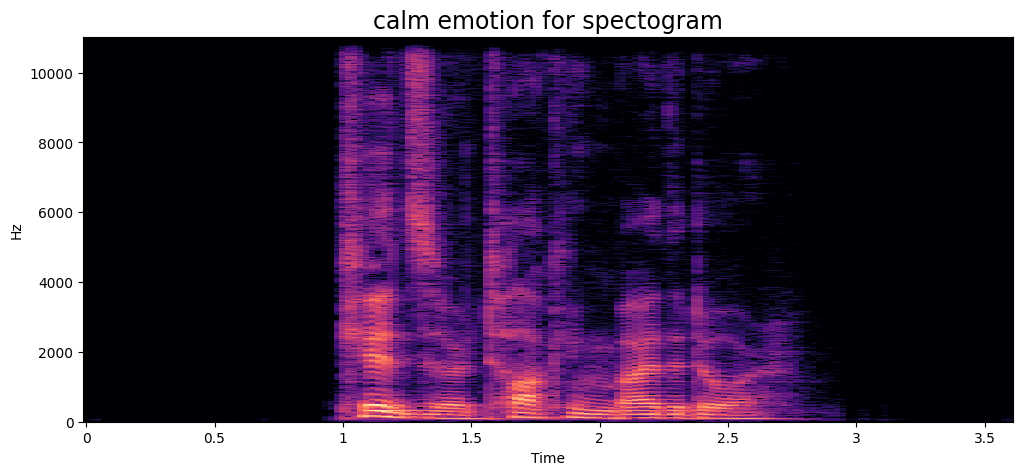

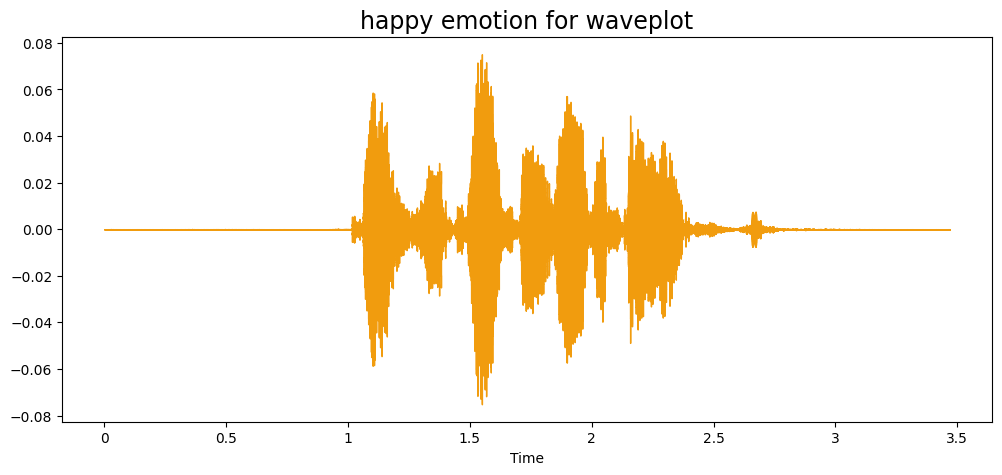

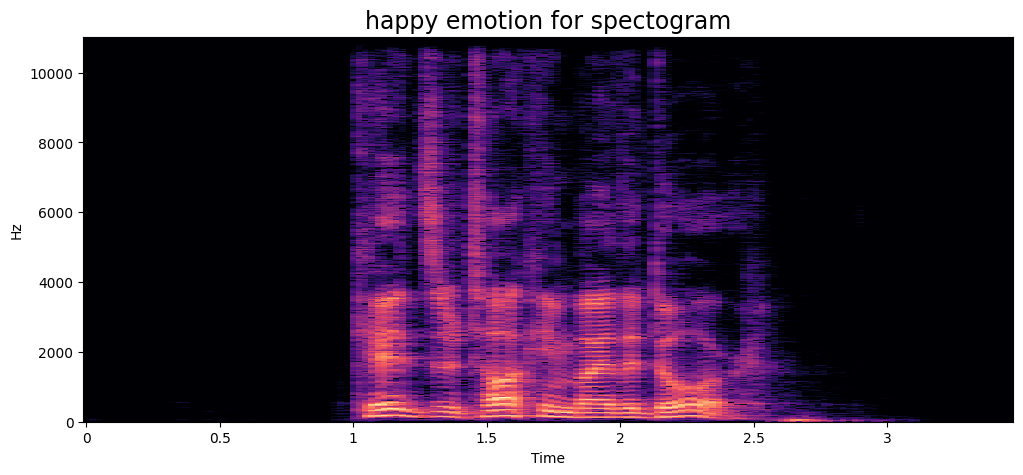

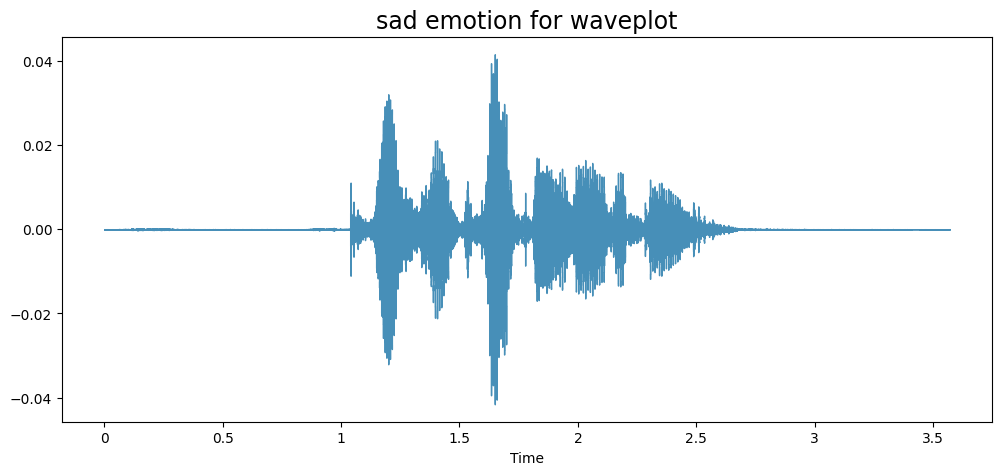

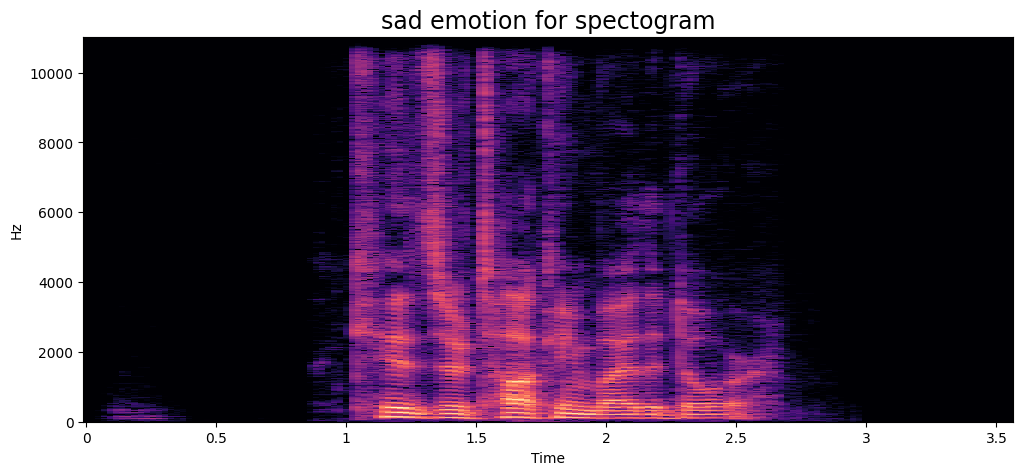

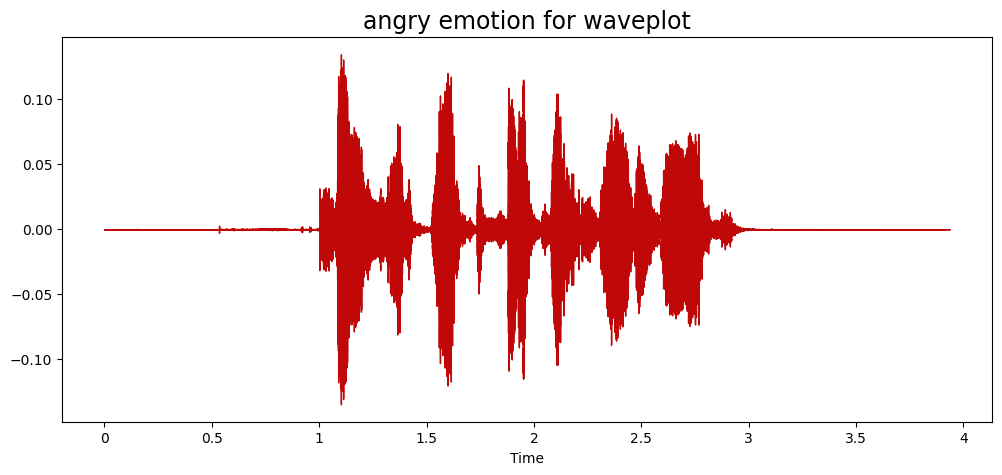

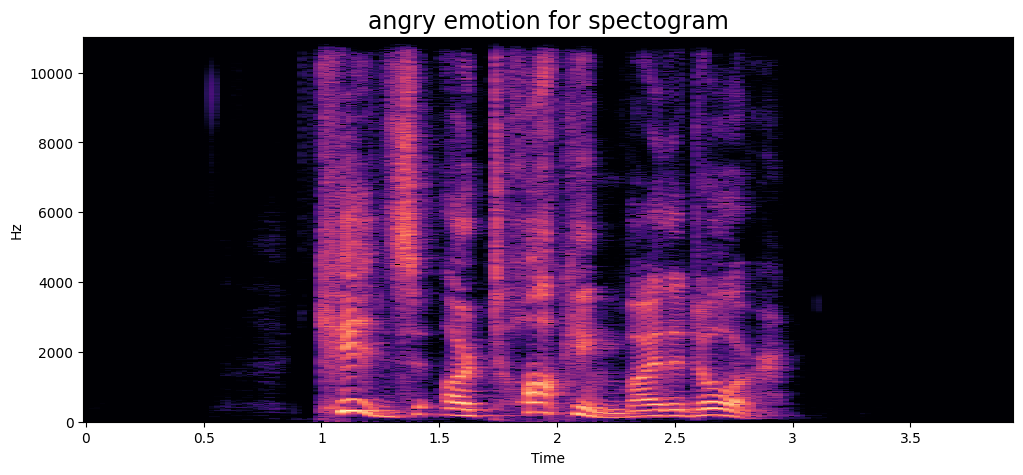

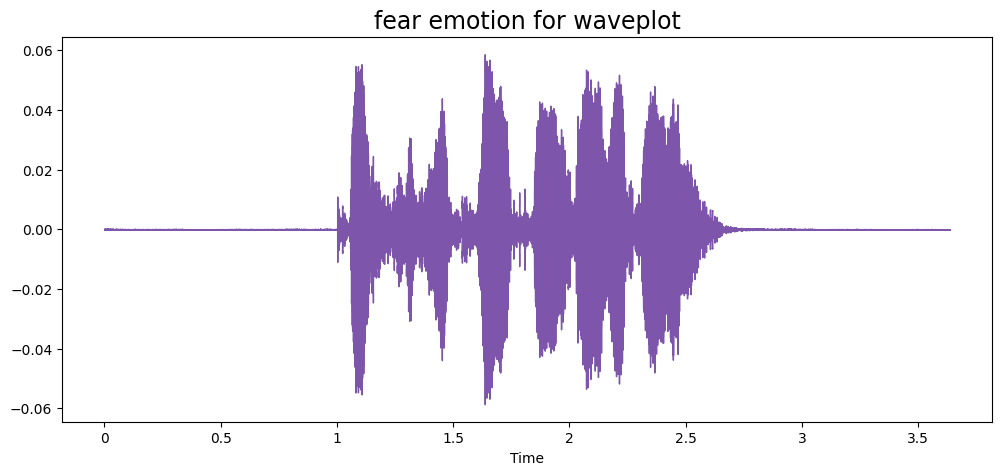

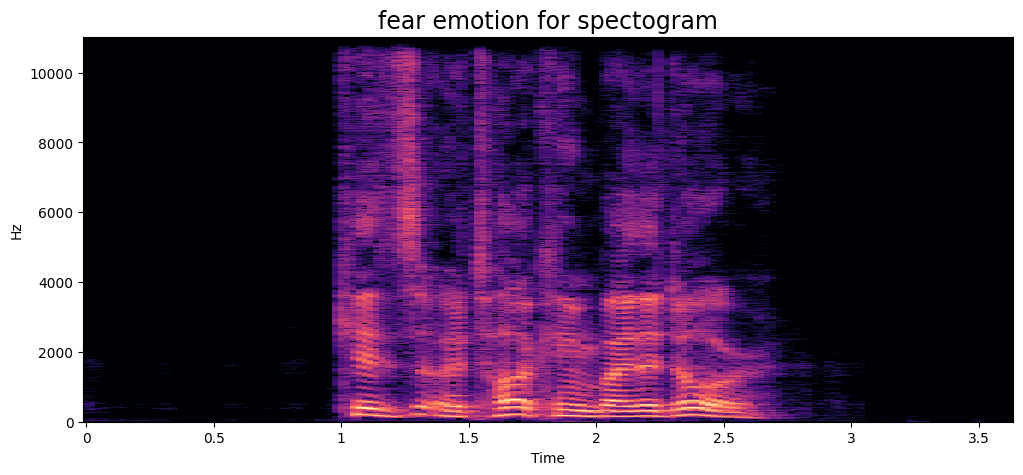

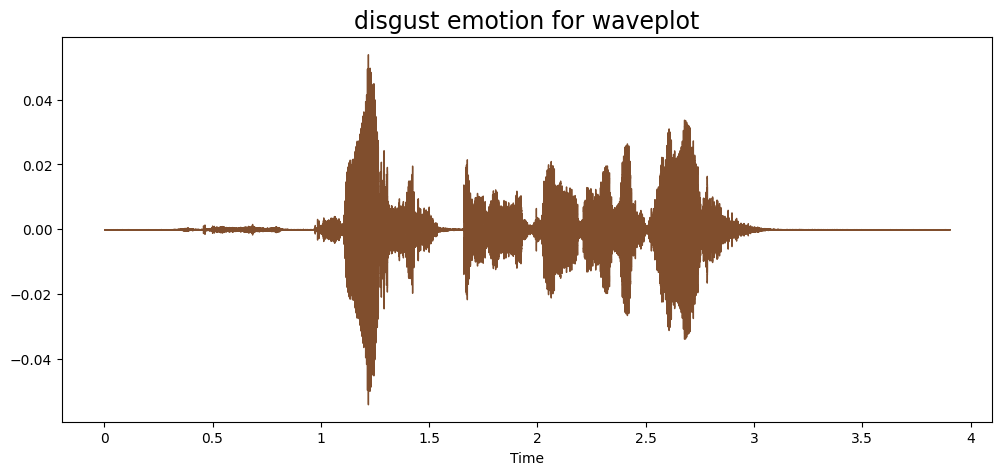

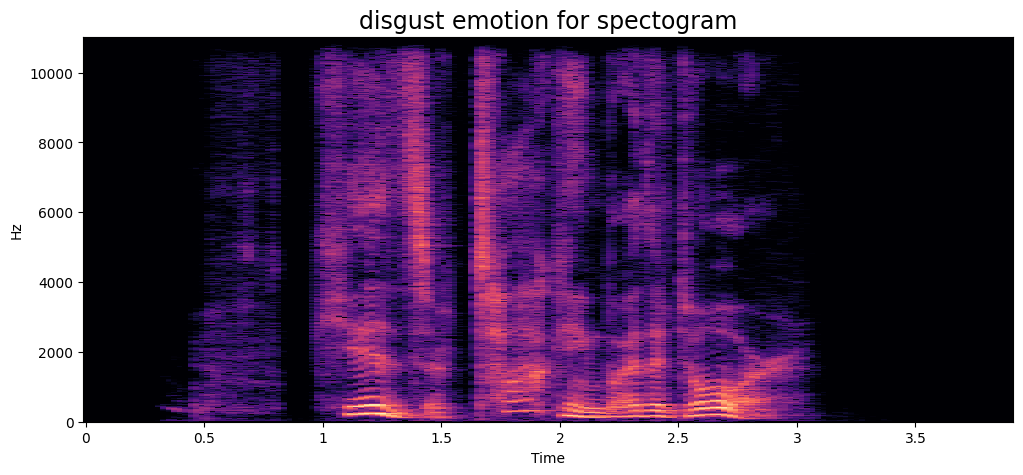

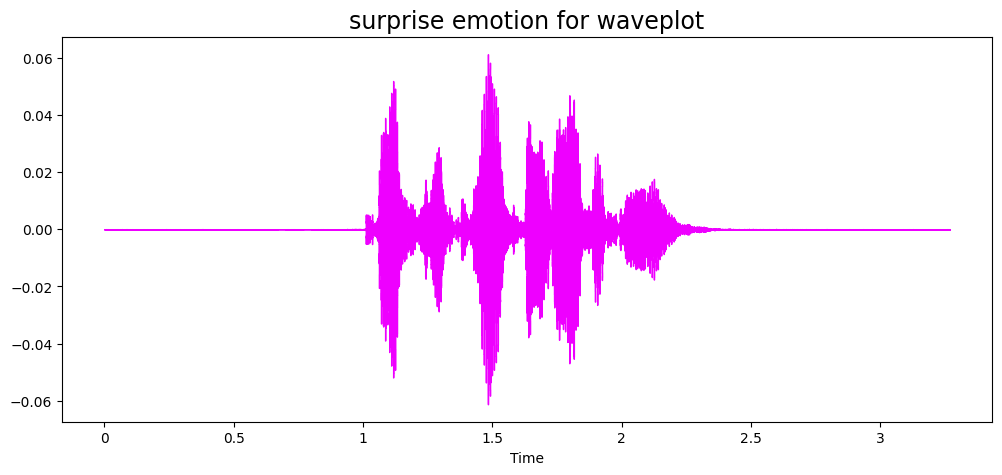

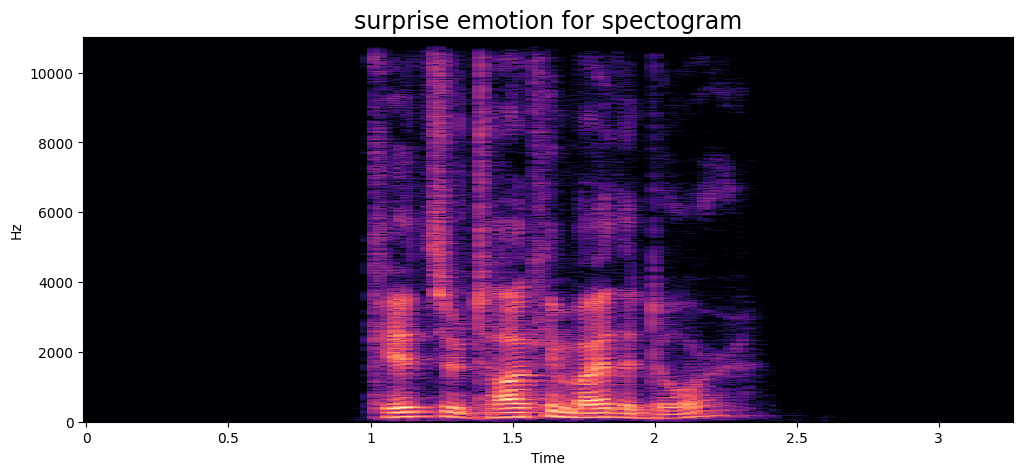

In [17]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')
audio_path=[]
for emotion in emotion_names:
    path=np.array(Ravdess_df['File_Path'][Ravdess_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)


# Prepocessing SAVEE Dataset

In [18]:
savee = []
for wav in os.listdir(Savee_Path):
    emo = wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]', '')
    emotion = re.split(r'[0-9]', emo)[0]
    if emotion == 'a':
        savee.append(('angry', os.path.join(Savee_Path, wav)))
    elif emotion == 'd':
        savee.append(('disgust', os.path.join(Savee_Path, wav)))
    elif emotion == 'f':
        savee.append(('fear', os.path.join(Savee_Path, wav)))
    elif emotion == 'h':
        savee.append(('happy', os.path.join(Savee_Path, wav)))
    elif emotion == 'n':
        savee.append(('neutral', os.path.join(Savee_Path, wav)))
    elif emotion == 'sa':
        savee.append(('sad', os.path.join(Savee_Path, wav)))
    elif emotion == 'su':
        savee.append(('surprise', os.path.join(Savee_Path, wav)))



# Contents of the Savee list

In [19]:
print(f"Savee list sample: {savee[:5]}")

Savee list sample: [('angry', 'archive (1)/Savee\\DC_a01.wav'), ('angry', 'archive (1)/Savee\\DC_a02.wav'), ('angry', 'archive (1)/Savee\\DC_a03.wav'), ('angry', 'archive (1)/Savee\\DC_a04.wav'), ('angry', 'archive (1)/Savee\\DC_a05.wav')]


# Savee DataFrame sample

In [20]:

Savee_df = pd.DataFrame(savee, columns=['Emotion', 'File_Path'])
print(f"Savee DataFrame sample:\n{Savee_df.head()}")

Savee DataFrame sample:
  Emotion                     File_Path
0   angry  archive (1)/Savee\DC_a01.wav
1   angry  archive (1)/Savee\DC_a02.wav
2   angry  archive (1)/Savee\DC_a03.wav
3   angry  archive (1)/Savee\DC_a04.wav
4   angry  archive (1)/Savee\DC_a05.wav


# Savee DataFrame structure

In [21]:
print(Savee_df.shape)
print(Savee_df.info())


(480, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotion    480 non-null    object
 1   File_Path  480 non-null    object
dtypes: object(2)
memory usage: 7.6+ KB
None


# Graphical Representation of Savee

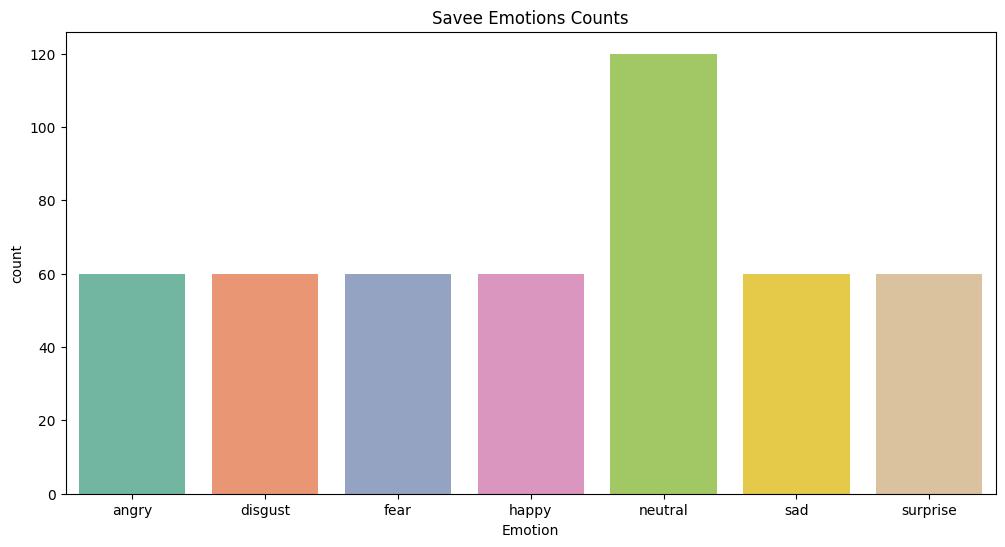

In [22]:
plt.figure(figsize=(12,6))
plt.title('Savee Emotions Counts')
emotions=sns.countplot(x='Emotion',data=Savee_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=0)
plt.show()

# Graphical Representation of each Emotion in Savee Dataset

In [23]:
emotion_names=Savee_df['Emotion'].unique()
print("Savee emotion names:" , emotion_names)

colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

Savee emotion names: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


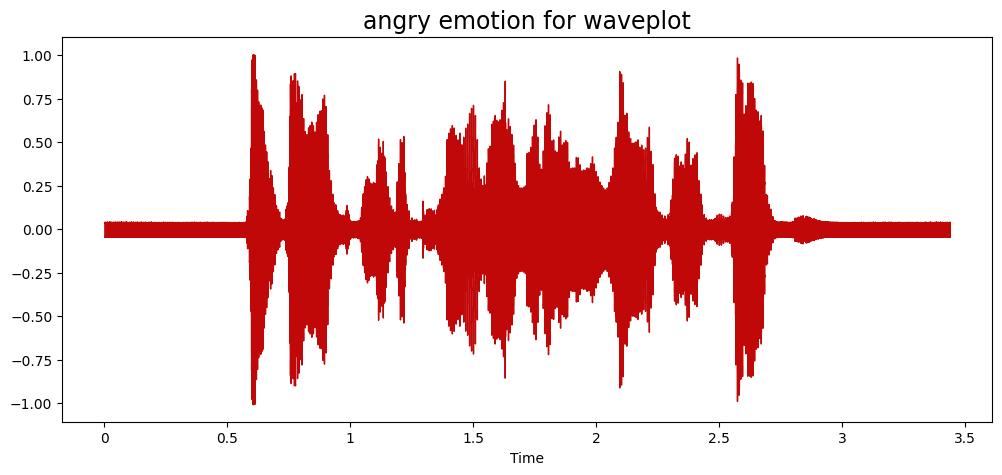

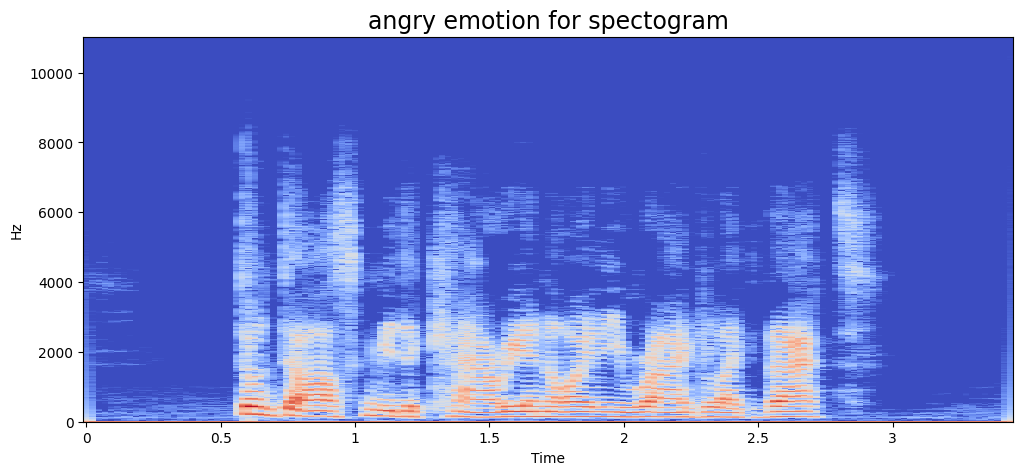

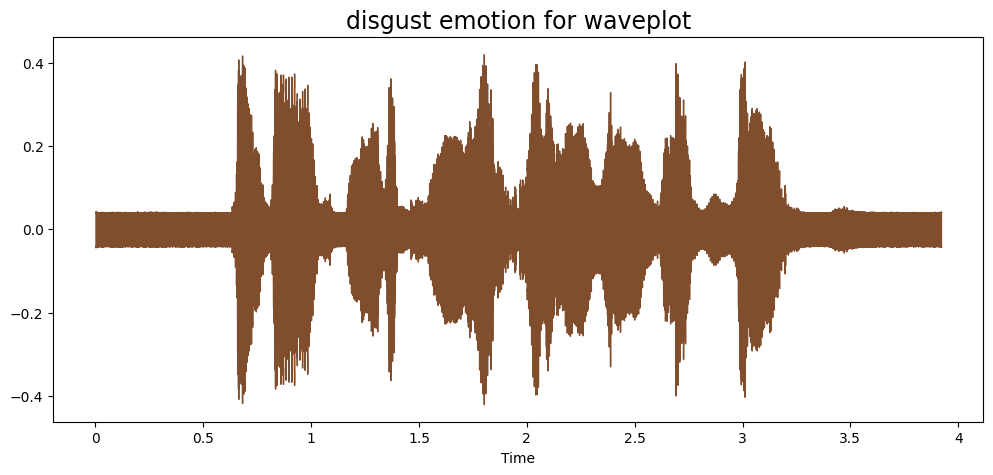

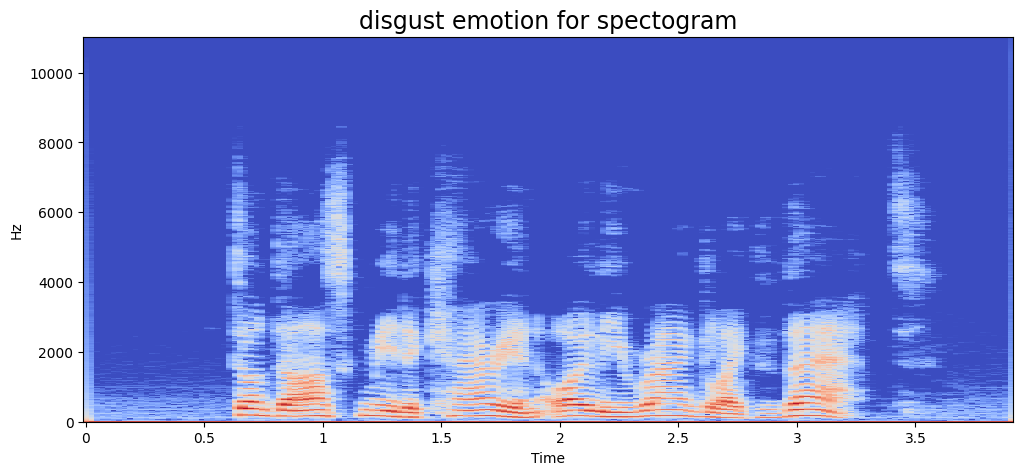

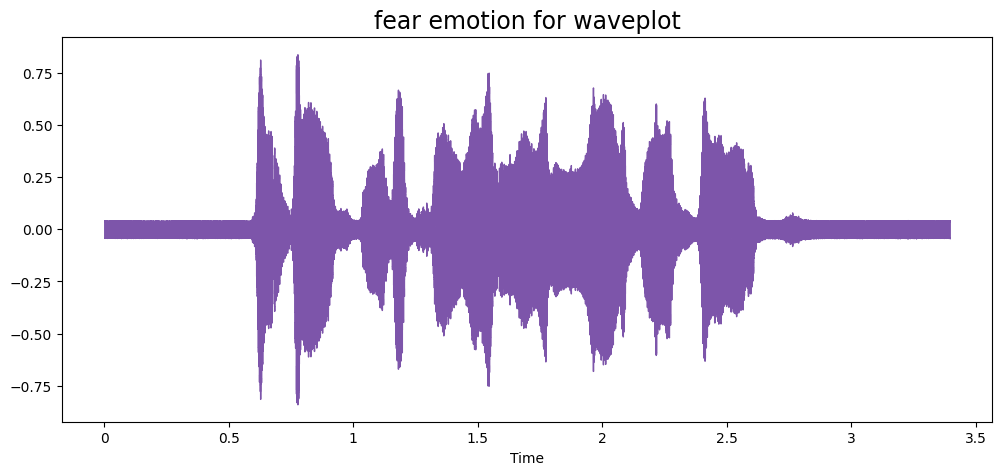

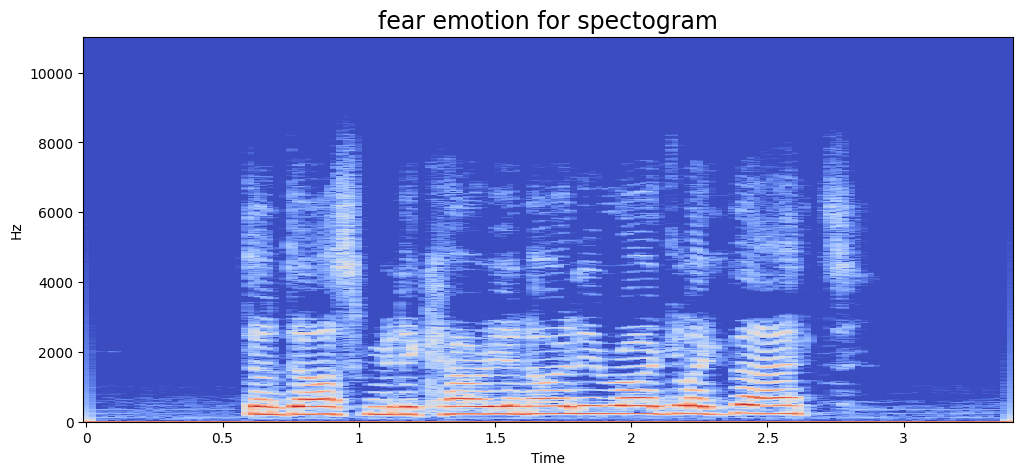

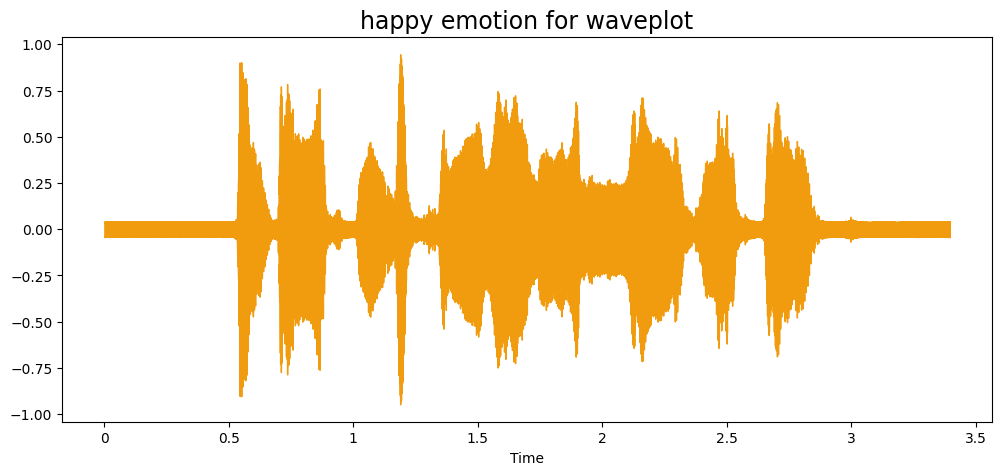

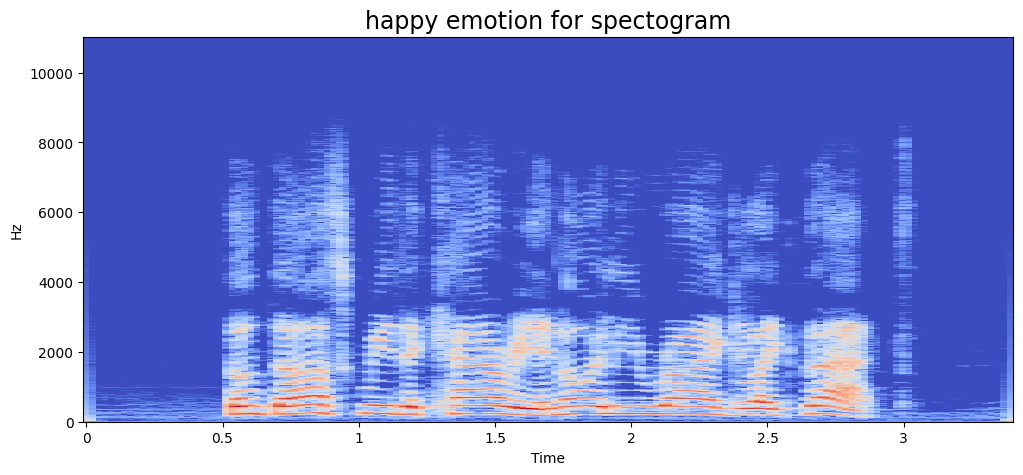

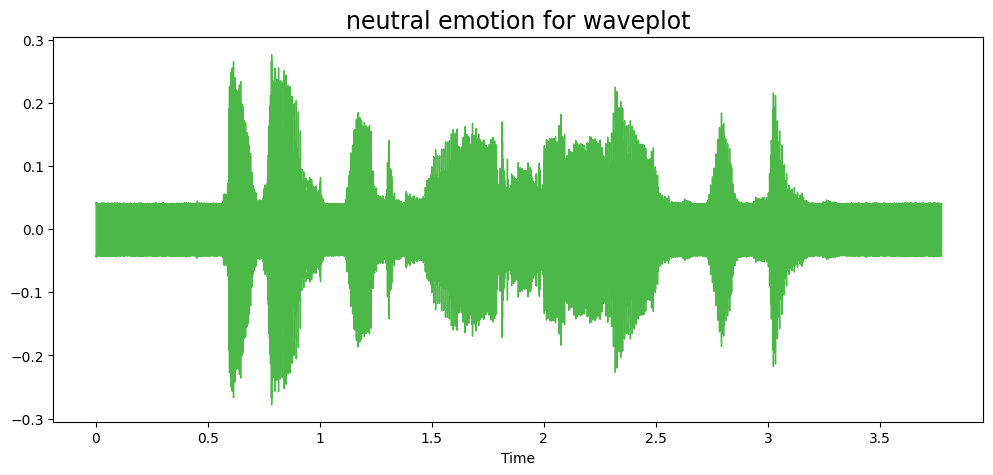

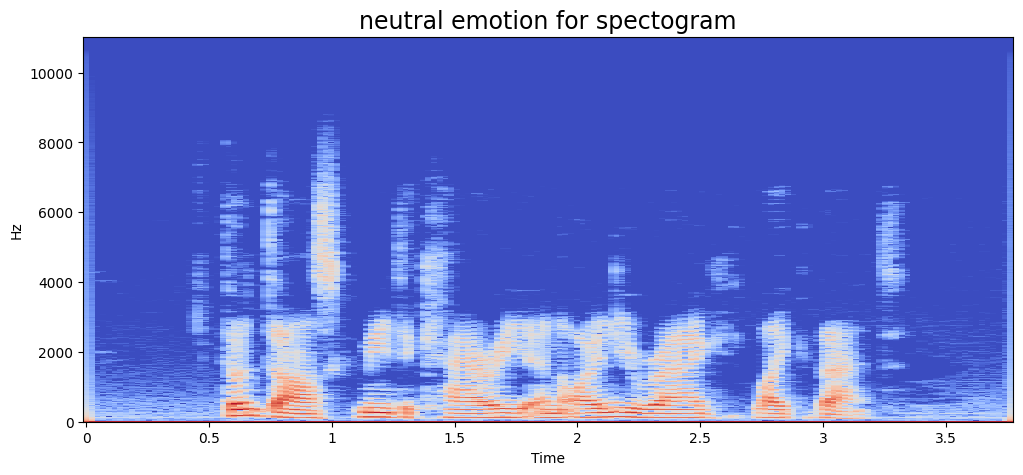

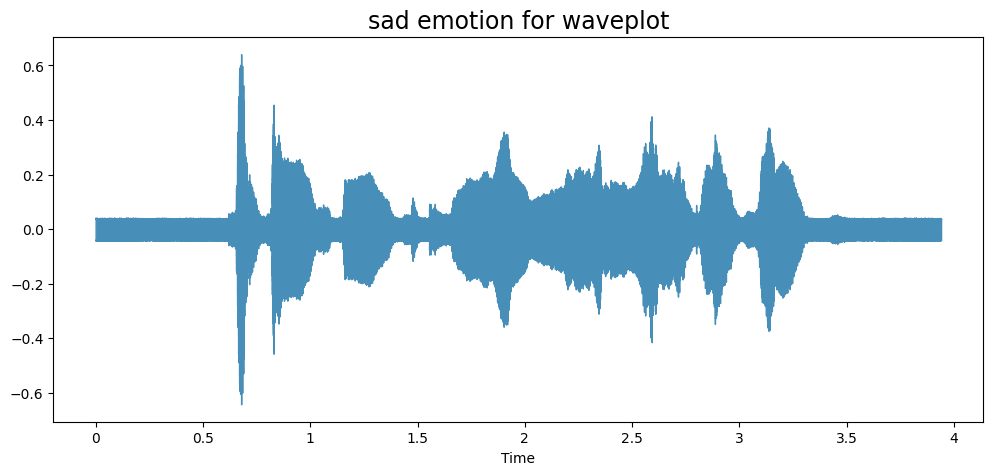

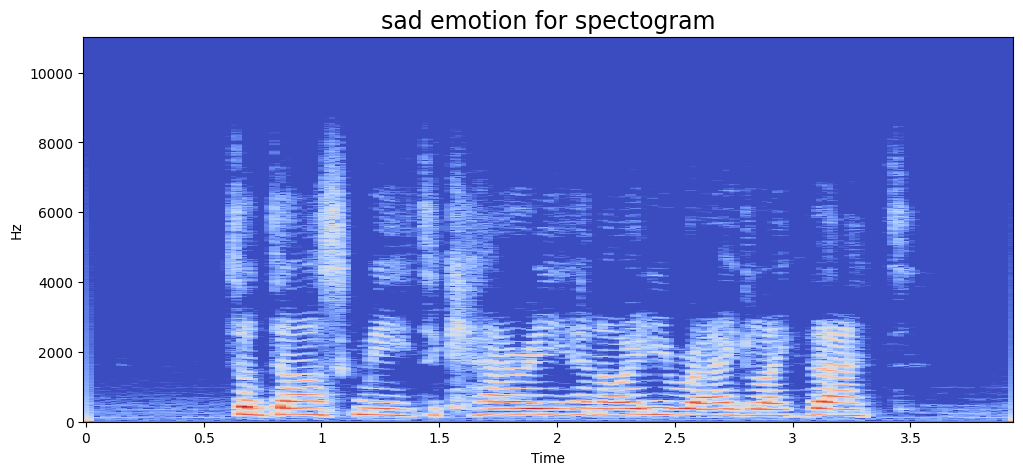

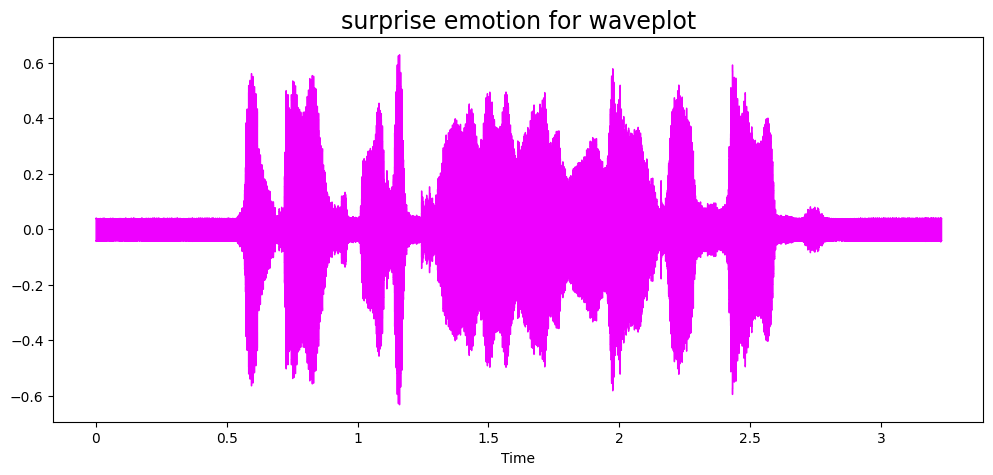

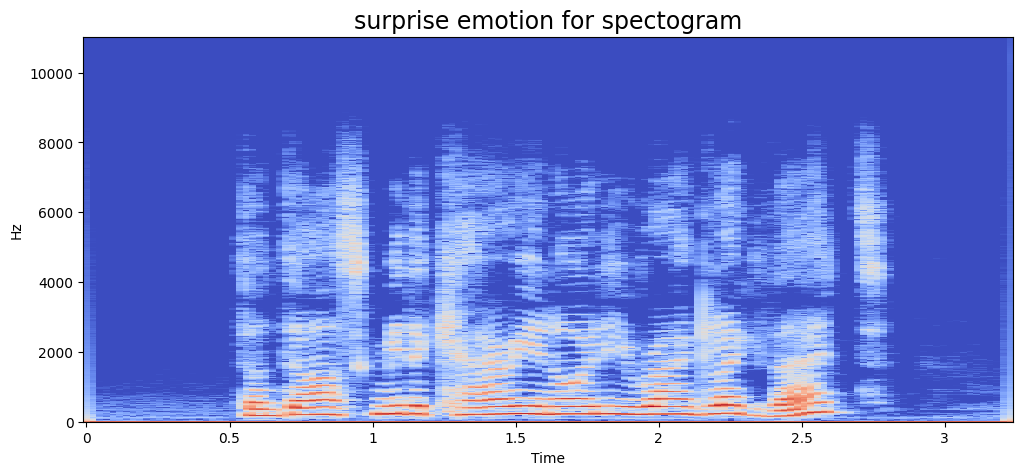

In [24]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')
audio_path=[]
for emotion in emotion_names:
    path=np.array(Savee_df['File_Path'][Savee_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

# Preprocessing TESS Dataset

In [25]:
tess = []
for directory in os.listdir(Tess_Path):
    dir_path = os.path.join(Tess_Path, directory)
    if os.path.isdir(dir_path):
        for wav in os.listdir(dir_path):
            wav_path = os.path.join(dir_path, wav)
            emotion = wav.partition('.wav')[0].split('_')
            if len(emotion) > 2 and emotion[2] == 'ps':
                tess.append(('surprise', wav_path))
            elif len(emotion) > 2:
                tess.append((emotion[2], wav_path))


# Contents of the Tess list


In [26]:
print(f"Tess list sample: {tess[:5]}")

Tess list sample: [('angry', 'archive (1)/Tess\\OAF_angry\\OAF_back_angry.wav'), ('angry', 'archive (1)/Tess\\OAF_angry\\OAF_bar_angry.wav'), ('angry', 'archive (1)/Tess\\OAF_angry\\OAF_base_angry.wav'), ('angry', 'archive (1)/Tess\\OAF_angry\\OAF_bath_angry.wav'), ('angry', 'archive (1)/Tess\\OAF_angry\\OAF_bean_angry.wav')]


# Tess DataFrame sample

In [27]:

Tess_df = pd.DataFrame(tess, columns=['Emotion', 'File_Path'])
print(f"Tess DataFrame sample:\n{Tess_df.head()}")
print(Tess_df.tail())

Tess DataFrame sample:
  Emotion                                      File_Path
0   angry  archive (1)/Tess\OAF_angry\OAF_back_angry.wav
1   angry   archive (1)/Tess\OAF_angry\OAF_bar_angry.wav
2   angry  archive (1)/Tess\OAF_angry\OAF_base_angry.wav
3   angry  archive (1)/Tess\OAF_angry\OAF_bath_angry.wav
4   angry  archive (1)/Tess\OAF_angry\OAF_bean_angry.wav
     Emotion                                   File_Path
2795     sad  archive (1)/Tess\YAF_sad\YAF_witch_sad.wav
2796     sad  archive (1)/Tess\YAF_sad\YAF_yearn_sad.wav
2797     sad    archive (1)/Tess\YAF_sad\YAF_yes_sad.wav
2798     sad  archive (1)/Tess\YAF_sad\YAF_young_sad.wav
2799     sad  archive (1)/Tess\YAF_sad\YAF_youth_sad.wav


# Tess Dataframe Structure

In [28]:
print(Savee_df.shape)
print(Savee_df.info())

(480, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotion    480 non-null    object
 1   File_Path  480 non-null    object
dtypes: object(2)
memory usage: 7.6+ KB
None


# Graphical Representation of Tess

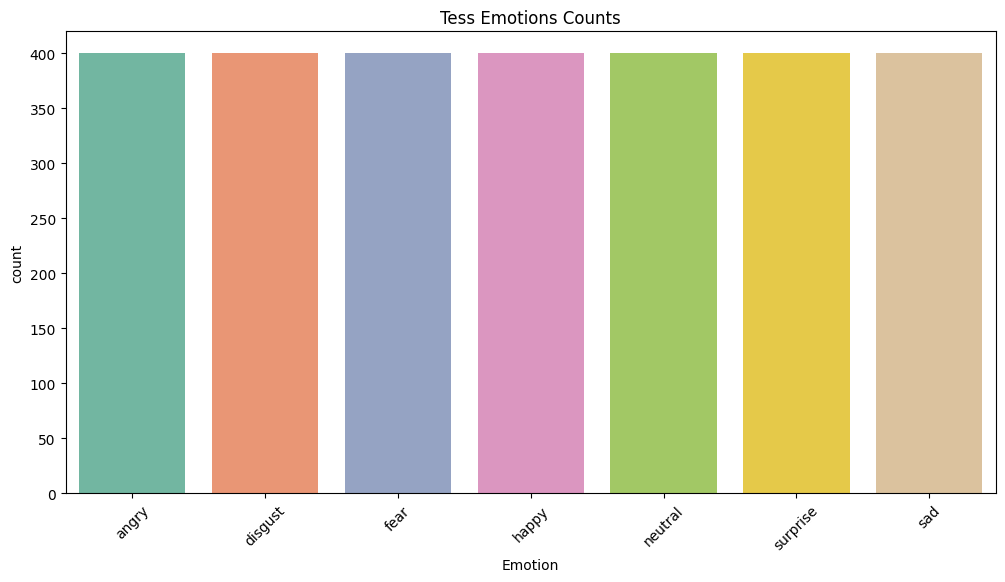

In [29]:
plt.figure(figsize=(12,6))
plt.title('Tess Emotions Counts')
emotions=sns.countplot(x='Emotion',data=Tess_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

# Graphical Representation of each emotion in TESS Dataset

In [30]:
emotion_names=Tess_df['Emotion'].unique()
print("Tess emotion names:" , emotion_names)

colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

Tess emotion names: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'surprise' 'sad']


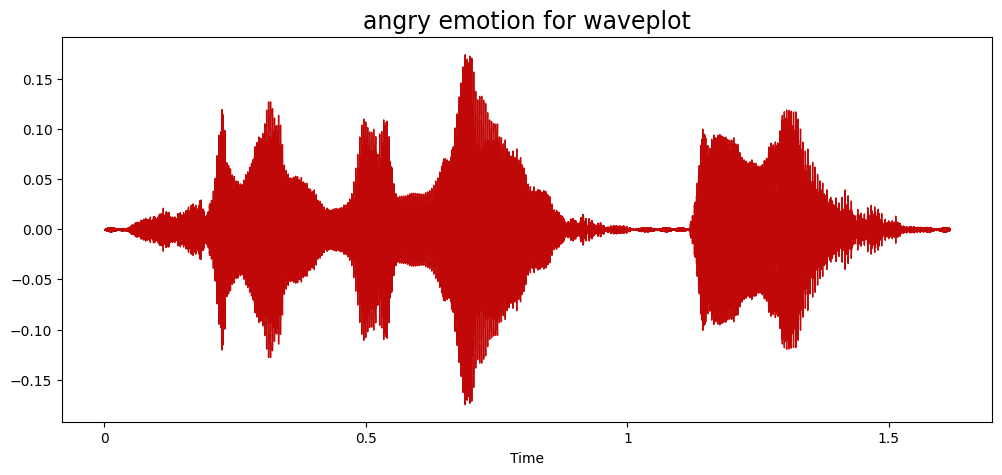

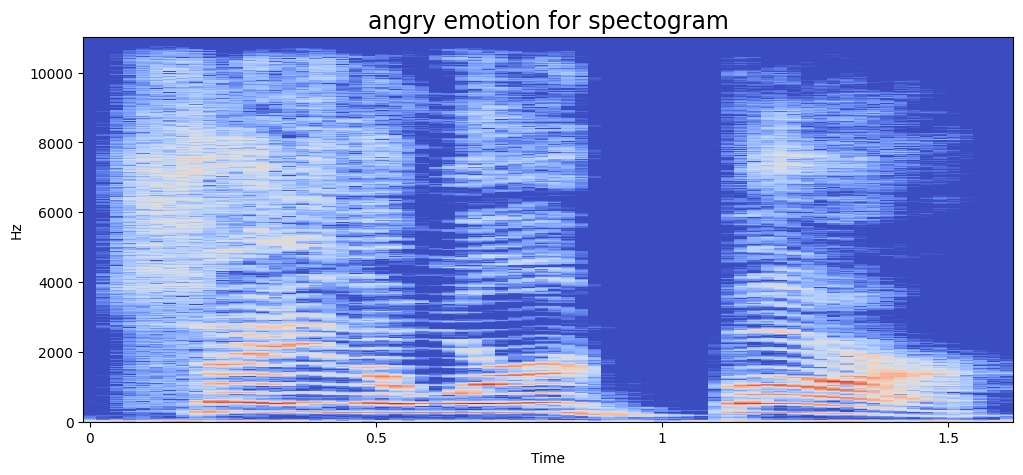

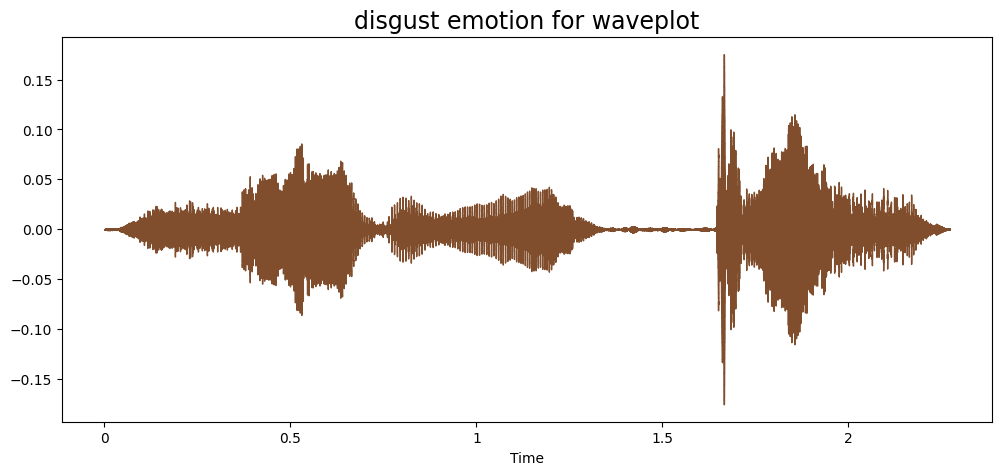

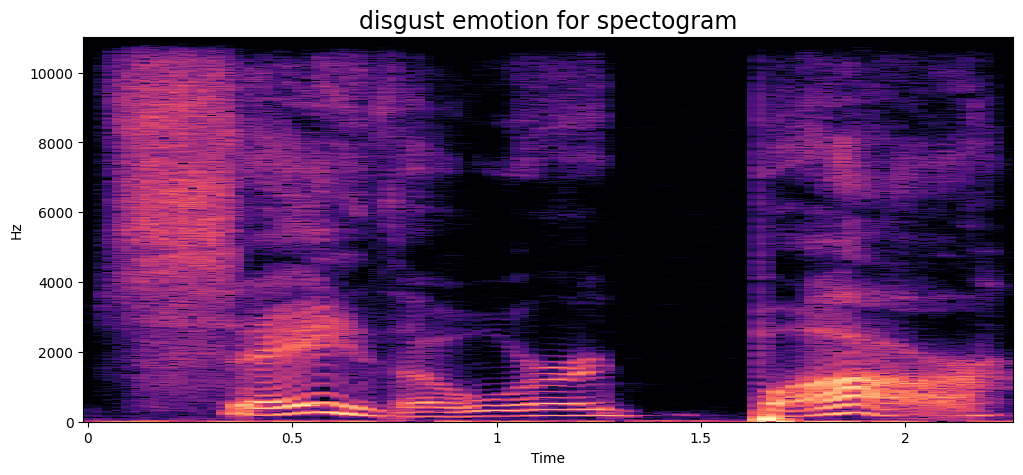

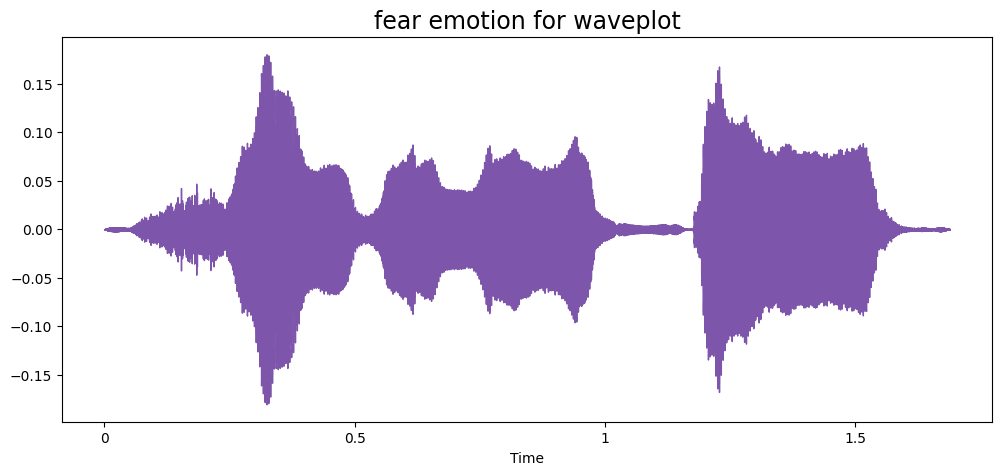

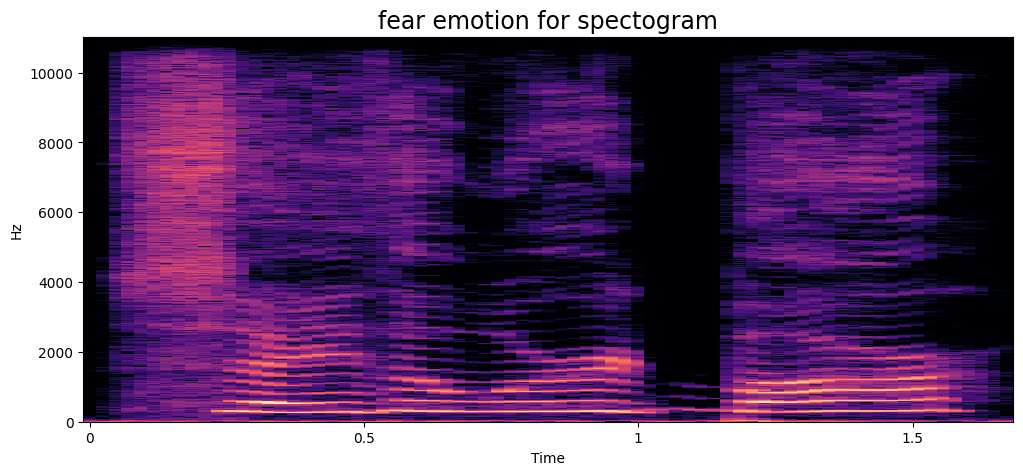

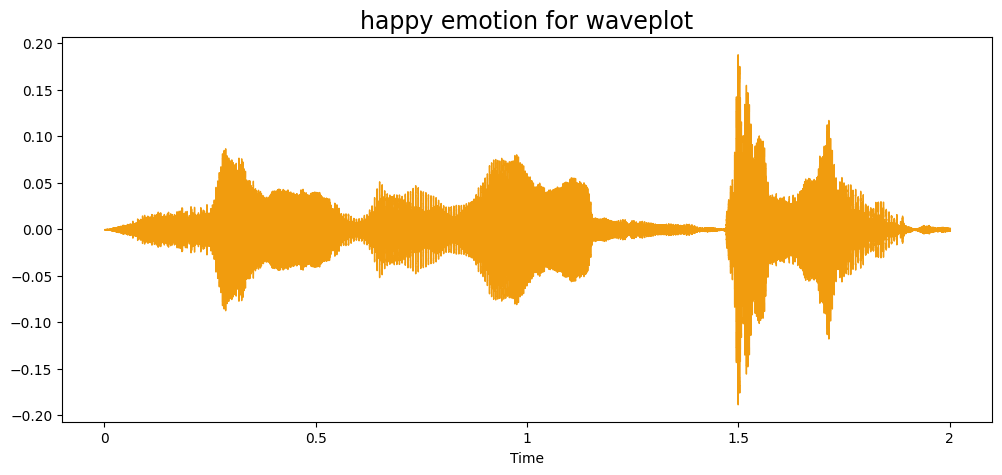

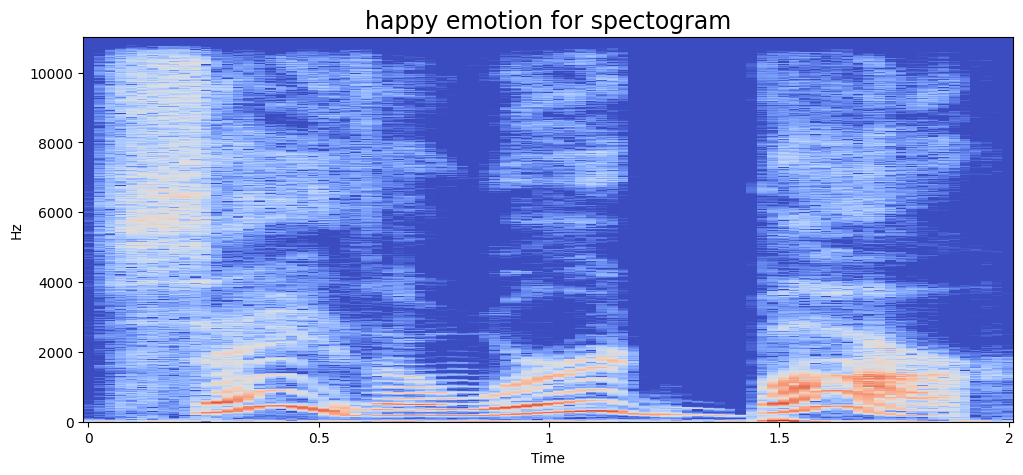

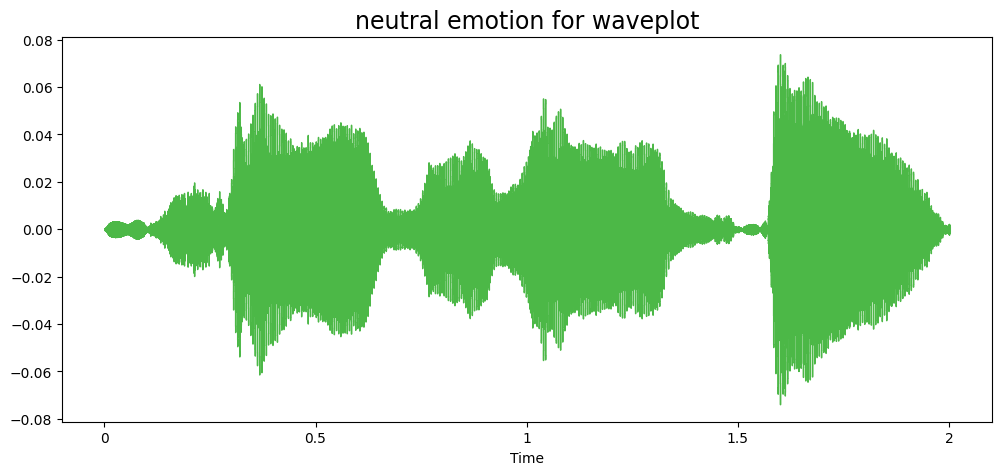

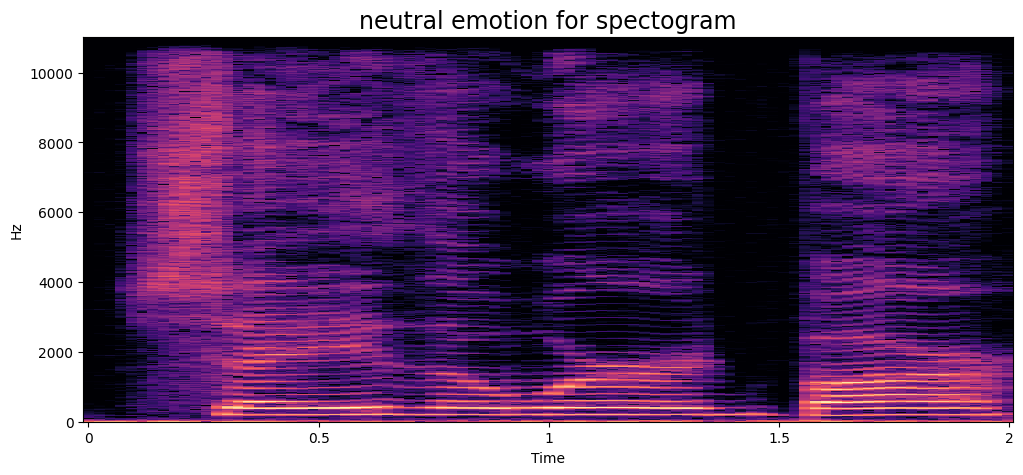

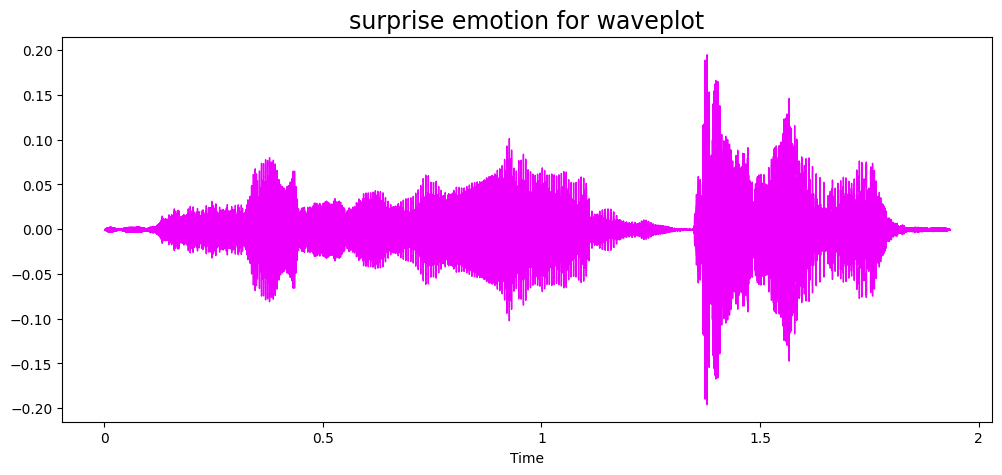

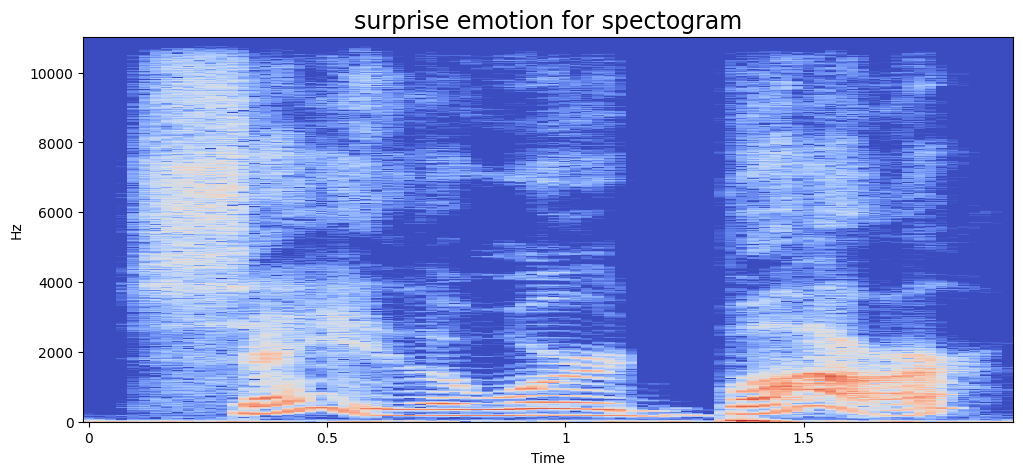

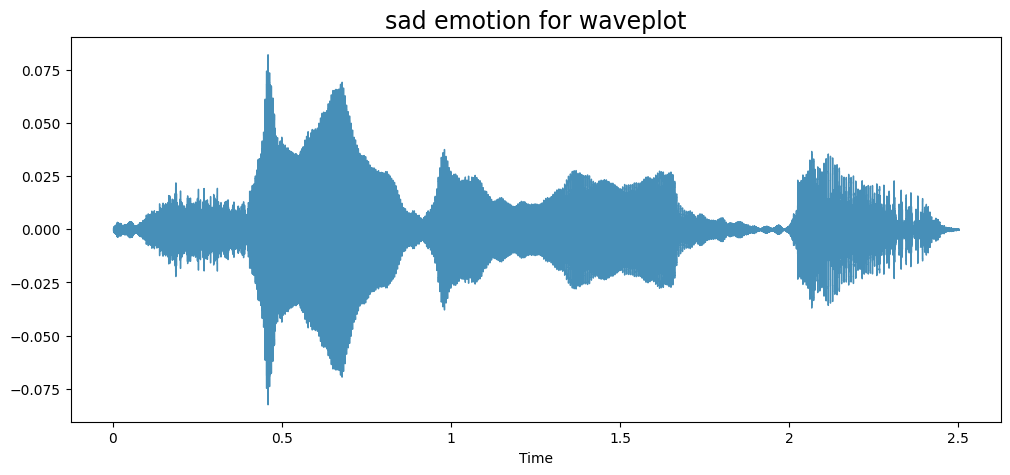

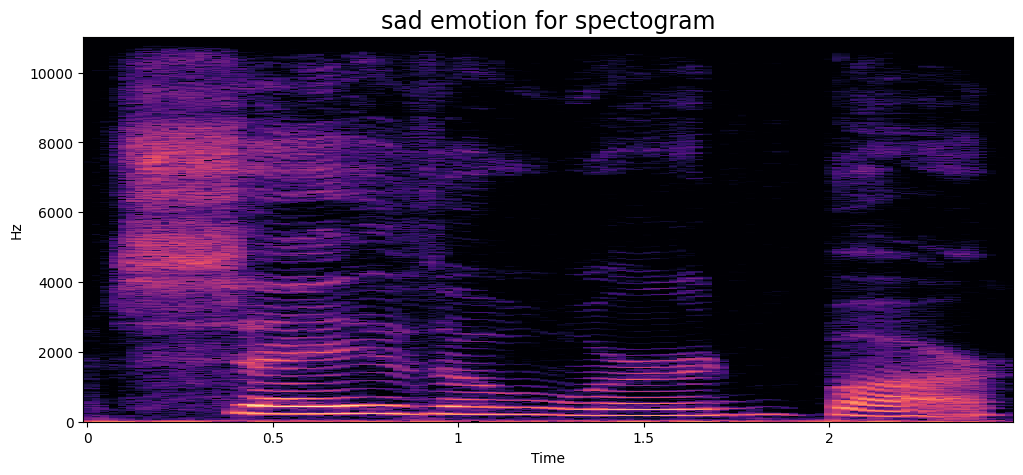

In [31]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')
audio_path=[]
for emotion in emotion_names:
    path=np.array(Tess_df['File_Path'][Tess_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

# Feature Extraction

MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale

Chroma Vector : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).

In [32]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotion                                          File_Path
0  neutral  archive (1)/Ravdess\Actor_01\03-01-01-01-01-01...
1  neutral  archive (1)/Ravdess\Actor_01\03-01-01-01-01-02...
2  neutral  archive (1)/Ravdess\Actor_01\03-01-01-01-02-01...
3  neutral  archive (1)/Ravdess\Actor_01\03-01-01-01-02-02...
4     calm  archive (1)/Ravdess\Actor_01\03-01-02-01-01-01...

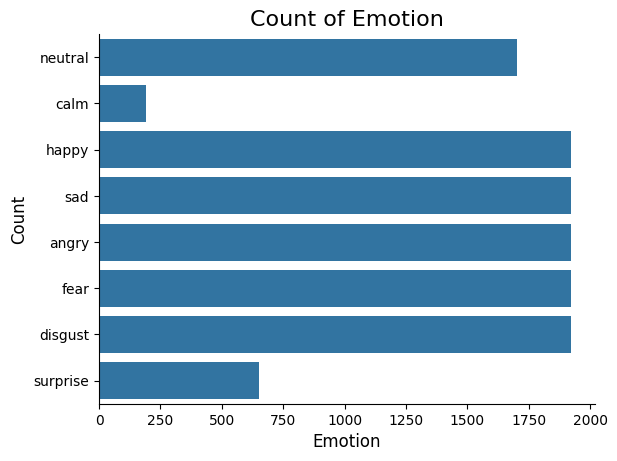

In [33]:
plt.title('Count of Emotion', size=16)
sns.countplot(data_path.Emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotion', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [34]:
from IPython.display import Audio

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

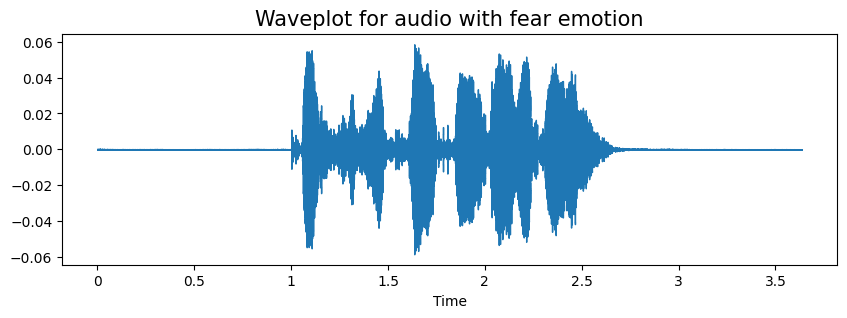

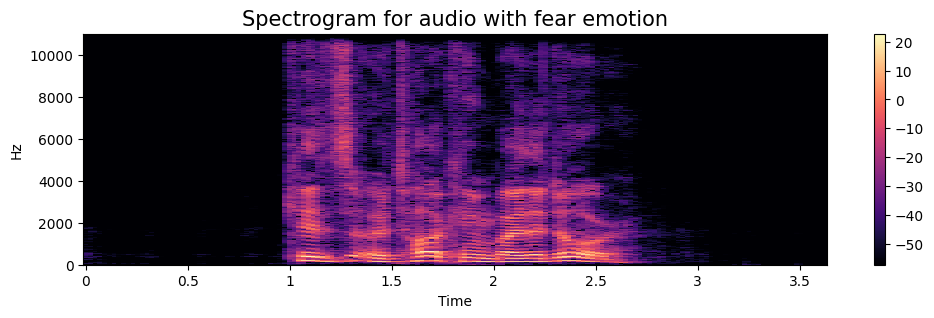

In [35]:
emotion='fear'
path = np.array(data_path.File_Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentaition

In [36]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.File_Path)[1]
data, sample_rate = librosa.load(path)

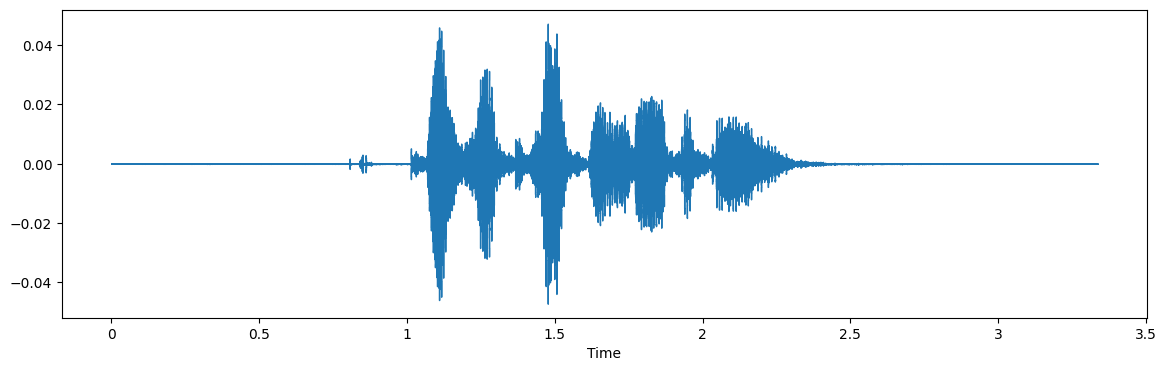

In [37]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

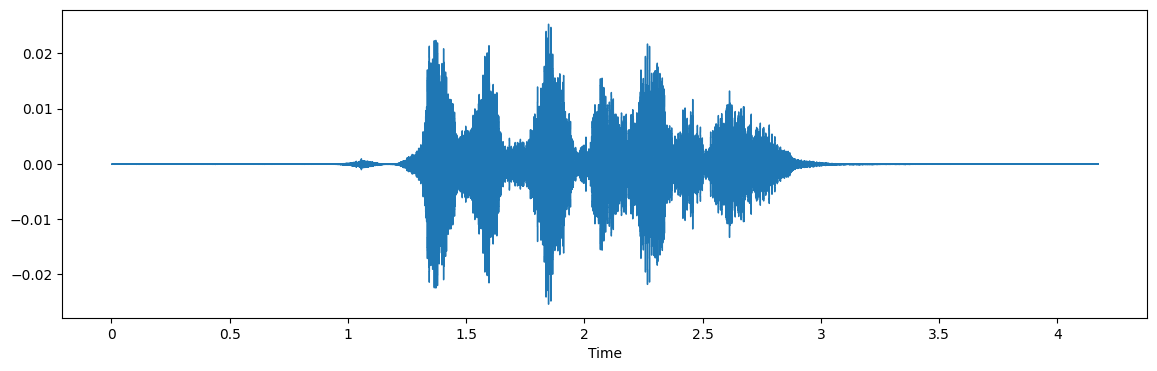

In [38]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [39]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [40]:
X, Y = [], []
for path, emotion in zip(data_path.File_Path, data_path.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), data_path.File_Path.shape

(36486, 36486, (12162,))

In [42]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.324160  0.799966  0.828093  0.811002  0.825088  0.821895  0.705688   
2  0.188256  0.622125  0.699215  0.753343  0.721212  0.701727  0.682356   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.292503  0.783450  0.801791  0.759497  0.753621  0.758770  0.660439   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.680054  0.731903  0.762678  ...  7.656063e-05  8.016954e-05   
2  0.662828  0.686486  0.733960  ...  8.579052e-07  9.576654e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034949e-06   
4  0.669792  0.713300  0.741346  ...  2.344894e-05  2.468549e-05   

            155           156           157           158       159       160  \
0  2.148075e-06  2.279739e-06  5.116493e-06  8.190282e-06  0.000007  0.000005   
1  7.613335e-05  7.595734e-05  8.164339e-05  8.528400e-05  0.000082  0.000084   
2  7.733596e-07  5.233101e-07  3.592860e-07  9.261693e-07  0.000002  0.000001   
3  6.654923e-06  6.979548e-06  1.214236e-05  9.640184e-06  0.000011  0.000006   
4  2.508740e-05  2.488957e-05  3.039863e-05  2.838732e-05  0.000029  0.000023   

            161   labels  
0  4.245834e-07  neutral  
1  7.543478e-05  neutral  
2  7.753986e-08  neutral  
3  4.254087e-07  neutral  
4  1.793426e-05  neutral  

[5 rows x 163 columns]

In [43]:
df=pd.read_csv('./final_dataset.csv')
df.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.319643  0.793979  0.839747  0.821713  0.814604  0.809805  0.706333   
2  0.188256  0.622125  0.699215  0.753343  0.721212  0.701727  0.682356   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.332122  0.783231  0.818937  0.808798  0.784825  0.795725  0.759460   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.669973  0.723464  0.754674  ...  6.023504e-05  5.953494e-05   
2  0.662828  0.686486  0.733960  ...  8.579052e-07  9.576654e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034949e-06   
4  0.659879  0.697119  0.730823  ...  1.398844e-04  1.446267e-04   

            155           156           157           158       159       160  \
0  2.148075e-06  2.279739e-06  5.116493e-06  8.190282e-06  0.000007  0.000005   
1  6.059830e-05  5.958963e-05  5.543482e-05  6.296567e-05  0.000066  0.000062   
2  7.733596e-07  5.233101e-07  3.592860e-07  9.261693e-07  0.000002  0.000001   
3  6.654923e-06  6.979548e-06  1.214236e-05  9.640184e-06  0.000011  0.000006   
4  1.442047e-04  1.332205e-04  1.477816e-04  1.423757e-04  0.000139  0.000142   

            161   labels  
0  4.245834e-07  neutral  
1  5.589501e-05  neutral  
2  7.753986e-08  neutral  
3  4.254087e-07  neutral  
4  1.284356e-04  neutral  

[5 rows x 163 columns]

In [44]:
df.shape

(36486, 163)

In [45]:
X = df.iloc[: ,:-1].values
Y = df['labels'].values

In [46]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [47]:
# Assuming X contains the extracted features and y contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Feature scaling (important for MLP models)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the MLPClassifier

In [49]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu', solver='adam', max_iter=500)
history = mlp.fit(X_train_scaled, y_train)

In [50]:
# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.6200328857221157


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report with precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1123
           1       0.88      0.68      0.76       120
           2       0.68      0.60      0.64      1200
           3       0.64      0.59      0.61      1102
           4       0.62      0.69      0.65      1133
           5       0.70      0.62      0.66      1005
           6       0.72      0.63      0.67      1225
           7       0.86      0.92      0.89       390

   micro avg       0.71      0.67      0.69      7298
   macro avg       0.74      0.69      0.71      7298
weighted avg       0.71      0.67      0.69      7298
 samples avg       0.64      0.67      0.65      7298



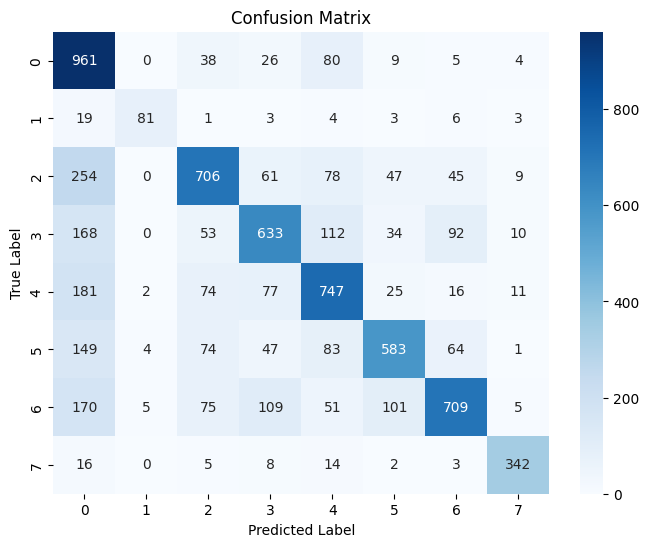

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# If y_test and y_pred are one-hot encoded, convert them back to label encoding
y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_single, y_pred_single)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Initialize MLP and RandomizedSearchCV

In [53]:
# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(256, 128, 64), (128, 64), (64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.0001, 0.01, 0.1],
    'alpha': [1e-5, 1e-4, 1e-3]
}

In [54]:
from sklearn.model_selection import RandomizedSearchCV

mlp = MLPClassifier(max_iter=1000)
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1)

In [55]:
# Use only a subset of the data for tuning
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train_scaled, y_train, test_size=0.8, random_state=42)
# X_train_sampled, y_train_sampled

In [ ]:
# Fit the model with random search
random_search.fit(X_train_scaled, y_train)

In [57]:
# Best parameters and model evaluation
print("Best Parameters:", random_search.best_params_)
best_mlp = random_search.best_estimator_
y_pred = best_mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with best parameters:", accuracy)

Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (256, 128, 64), 'alpha': 0.0001, 'activation': 'relu'}
Test Accuracy with best parameters: 0.6285283639353247


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report with precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      1123
           1       0.75      0.81      0.78       120
           2       0.67      0.59      0.62      1200
           3       0.69      0.59      0.64      1102
           4       0.66      0.67      0.67      1133
           5       0.64      0.68      0.66      1005
           6       0.70      0.70      0.70      1225
           7       0.91      0.89      0.90       390

   micro avg       0.71      0.68      0.69      7298
   macro avg       0.73      0.71      0.72      7298
weighted avg       0.71      0.68      0.69      7298
 samples avg       0.65      0.68      0.66      7298



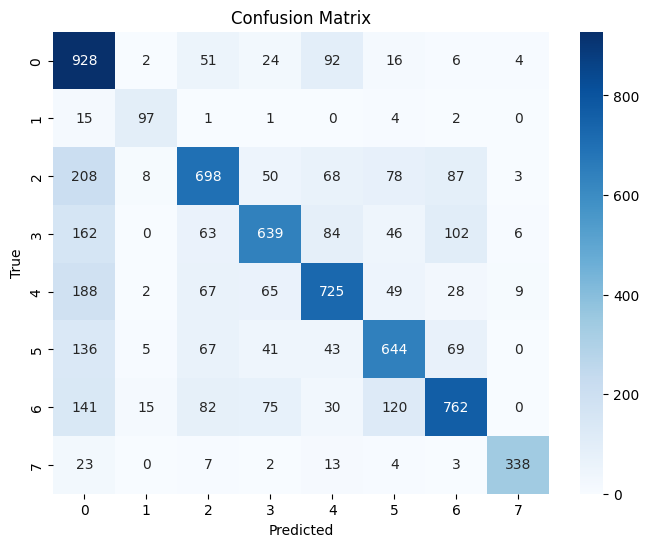

In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert one-hot encoded labels to single labels
y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_test_single, y_pred_single)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Initialize MLP and GridSearchCV

In [60]:
# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(256, 128, 64), (128, 64), (64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.0001, 0.01, 0.1],
     'alpha': [1e-5, 1e-4, 1e-3]
}

In [61]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=500)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [62]:
# Use only a subset of the data for tuning
X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train_scaled, y_train, test_size=0.8, random_state=42)

# Perform grid search on the subset
grid_search.fit(X_train_sampled, y_train_sampled)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [1e-05, 0.0001, 0.001],
                         'hidden_layer_sizes': [(256, 128, 64), (128, 64),
                                                (64, 32)],
                         'learning_rate_init': [0.001, 0.0001, 0.01, 0.1],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [63]:
#  Best parameters and model evaluation
print("Best Parameters:", grid_search.best_params_)
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with best parameters:", accuracy)

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (256, 128, 64), 'learning_rate_init': 0.01, 'solver': 'adam'}
Test Accuracy with best parameters: 0.4805426144149082


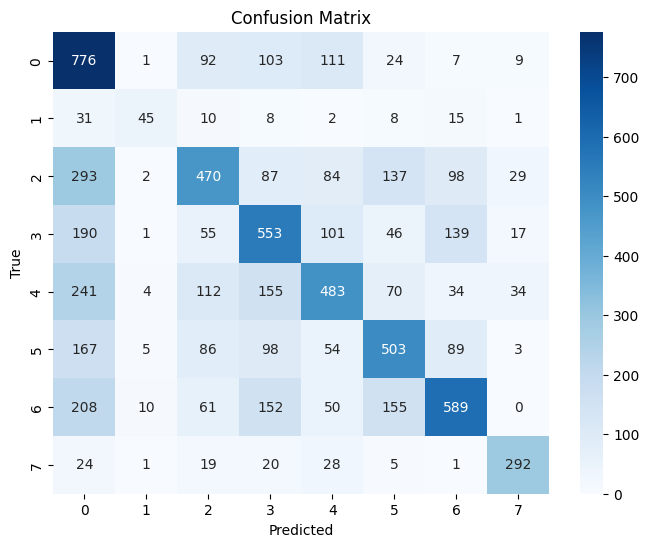

In [64]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert one-hot encoded labels to single labels
y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_test_single, y_pred_single)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
